In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# import dataset
df = pd.read_excel('DataSet_v1.xlsx', skiprows=3).drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(667, 16)


,ID,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Final average,Target,Output Feature 2
0,1,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,13.40,Approved,Complete
1,2,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,17.90,Approved,Complete
2,3,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,5.05,Disapproved,Complete
3,4,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,19.50,Approved,Complete
4,5,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,11.60,Disapproved,Complete


##### Initial Analysis

In [4]:
# check for missing values
df.isnull().sum()

ID                          0
Year of Income              0
Career                      0
Gender                      0
Qualified Practice 1        0
Partial Task                2
Midterm Exam                2
Qualified Practice 2        0
Final Task                  2
Participation in Class      0
Final Exam                  0
Linguistic Comprehension    0
Mathematic                  0
Final average               0
Target                      0
Output Feature 2            0
dtype: int64

In [5]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

ID                          0.00000
Year of Income              0.00000
Career                      0.00000
Gender                      0.00000
Qualified Practice 1        0.00000
Partial Task                0.29985
Midterm Exam                0.29985
Qualified Practice 2        0.00000
Final Task                  0.29985
Participation in Class      0.00000
Final Exam                  0.00000
Linguistic Comprehension    0.00000
Mathematic                  0.00000
Final average               0.00000
Target                      0.00000
Output Feature 2            0.00000
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [6]:
# drop missing values
df.dropna(inplace=True)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check data types
df.dtypes

ID                            int64
Year of Income                int64
Career                       object
Gender                       object
Qualified Practice 1          int64
Partial Task                float64
Midterm Exam                float64
Qualified Practice 2        float64
Final Task                  float64
Participation in Class        int64
Final Exam                  float64
Linguistic Comprehension      int64
Mathematic                    int64
Final average               float64
Target                       object
Output Feature 2             object
dtype: object

In [9]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [10]:
# check number of unique values
df.nunique()

ID                          661
Year of Income                3
Career                        3
Gender                        2
Qualified Practice 1         21
Partial Task                  9
Midterm Exam                 21
Qualified Practice 2         24
Final Task                   15
Participation in Class       13
Final Exam                   23
Linguistic Comprehension     20
Mathematic                   19
Final average               177
Target                        2
Output Feature 2              2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

In [11]:
# drop redundant columns
df.drop(['ID','Qualified Practice 2','Final Task','Participation in Class','Final Exam','Linguistic Comprehension','Mathematic', 'Output Feature 2','Final average'], axis=1, inplace=True)

In [12]:
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Target
0,2022,ISI,M,9,19.0,17.0,Approved
1,2022,ISI,F,15,20.0,20.0,Approved
2,2022,ISI,M,6,0.0,0.0,Disapproved
3,2022,ISI,M,20,20.0,20.0,Approved
4,2022,ISI,M,6,16.0,15.0,Disapproved


##### Univariate Analysis of Numerical Features

Feature Name: Qualified Practice 1
Mean: 12.198184568835098
Median: 13.0
Standard Deviation: 6.192497638453004
Minimum: 0
Maximum: 20
Skewness: -0.28684268074828206
Kurtosis: -1.067693743032935


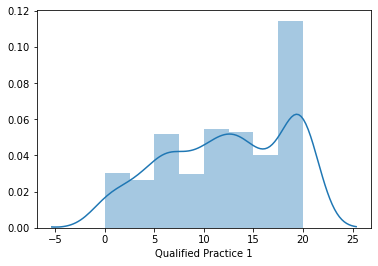

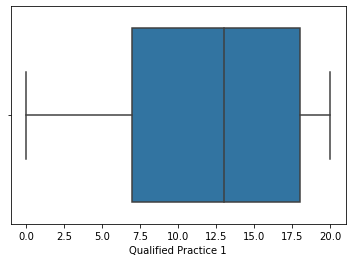

----------------------------------------
Feature Name: Partial Task
Mean: 17.89409984871407
Median: 18.0
Standard Deviation: 2.1357657733234685
Minimum: 0.0
Maximum: 20.0
Skewness: -3.7954802882639673
Kurtosis: 28.171000611134698


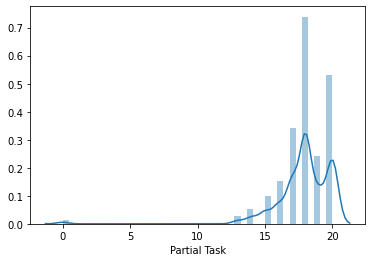

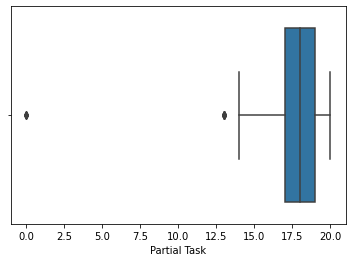

----------------------------------------
Feature Name: Midterm Exam
Mean: 12.399394856278366
Median: 13.0
Standard Deviation: 5.909745387268121
Minimum: 0.0
Maximum: 20.0
Skewness: -0.49317840413966296
Kurtosis: -0.7294444667049187


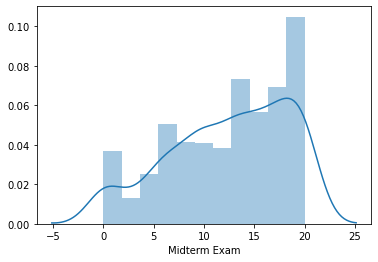

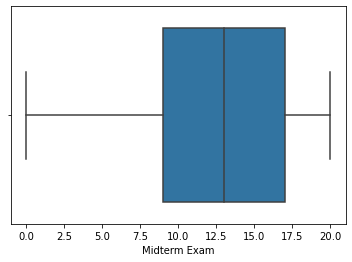

----------------------------------------


In [13]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

In [14]:
#Observations
#- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
#- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
#- Midterm Exam seems normally distributed with no presence of outliers.
#- Final Task seems negatively skewed but no presence of outliers can be observed.
#- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
#- Final Exam seems normally distributed with no presence of outliers.
#- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
#- Output is normally distributed with no outliers.

# Univariate Analysis of Categorical Features

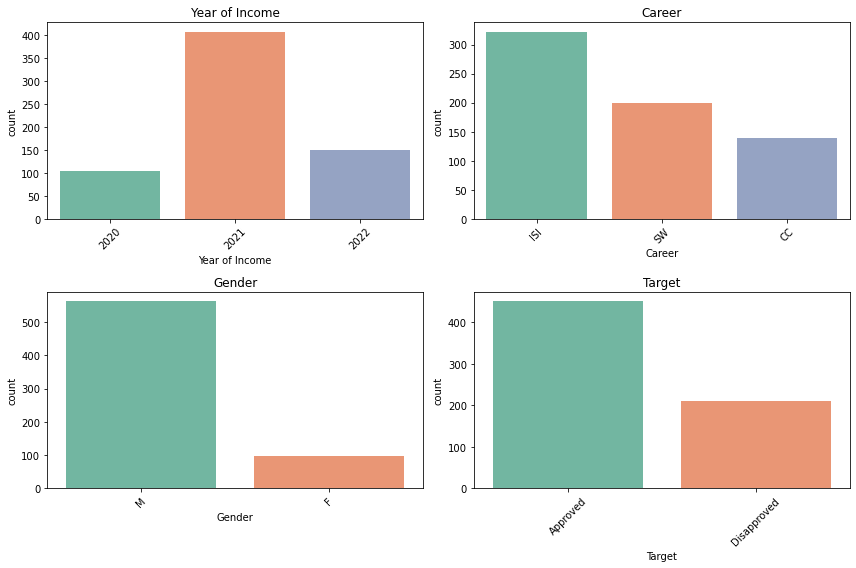

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Target is balanced.

##### Multivariate Analysis of Categorical Features

##### Multivariate Analysis of Numerical Features

In [16]:
# label encode target variable using map
df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

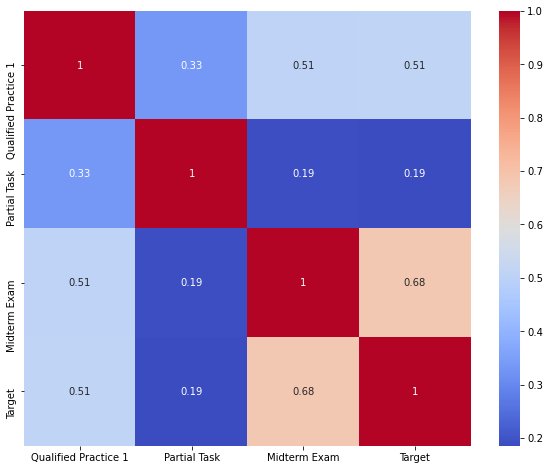

In [17]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Data Augmentation (GAN)

In [18]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Target
0,2,1,1,9,19.0,17.0,1
1,2,1,0,15,20.0,20.0,1
2,2,1,1,6,0.0,0.0,0
3,2,1,1,20,20.0,20.0,1
4,2,1,1,6,16.0,15.0,0
...,...,...,...,...,...,...,...
662,1,2,1,19,18.0,14.0,1
663,1,2,1,11,18.0,9.0,1
664,1,2,1,18,18.0,20.0,1
665,1,2,1,18,19.0,12.0,1


In [20]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam
532,2,1,1,15,19.0,17.0
333,1,2,1,16,18.0,9.0
556,2,1,0,14,20.0,10.0
662,1,2,1,19,18.0,14.0
457,1,2,1,10,15.0,16.0
...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0
372,0,1,1,12,18.0,7.0
423,0,1,0,18,18.0,13.0
650,1,0,1,14,18.0,19.0


In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
def create_generator(input_dim, num_classes):
    input_noise = Input(shape=(input_dim,))
    input_label = Input(shape=(1,))
    x = Concatenate()([input_noise, input_label])

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim + num_classes))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(X_train.shape[1:]), activation='tanh'))

    x = model(x)
    return Model([input_noise, input_label], x)

In [24]:
def create_discriminator():
    input_data = Input(shape=X_train.shape[1:])
    input_label = Input(shape=(1,))
    x = Concatenate()([input_data, input_label])

    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1] + 1))
    model.add(LeakyReLU(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))

    x = model(x)
    return Model([input_data, input_label], x)

In [25]:
def train_gan(epochs, batch_size):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_samples = X_train.iloc[idx]
        real_labels = y.values[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        synthetic_labels = 1 - real_labels
        synthetic_samples = generator.predict([noise, synthetic_labels])

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], np.ones(half_batch))
        d_loss_synthetic = discriminator.train_on_batch([synthetic_samples, synthetic_labels], np.zeros(half_batch))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_synthetic)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        sampled_labels = np.random.randint(0, 2, batch_size)
        g_loss = combined.train_on_batch([noise, sampled_labels], np.ones(batch_size))

        print(f"Epoch {epoch}: [D loss: {d_loss}, acc: {0.5 * (d_loss_real[1] + d_loss_synthetic[1])}] [G loss: {g_loss}]")

In [26]:
generator = create_generator(100, 1)
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8), metrics=['accuracy'])

In [27]:
# Freeze the discriminator for generator training
discriminator.trainable = False
gan_input_noise = Input(shape=(100,))
gan_input_label = Input(shape=(1,))
x = generator([gan_input_noise, gan_input_label])
gan_output = discriminator([x, gan_input_label])
combined = Model([gan_input_noise, gan_input_label], gan_output)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8))

In [28]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam
532,2,1,1,15,19.0,17.0
333,1,2,1,16,18.0,9.0
556,2,1,0,14,20.0,10.0
662,1,2,1,19,18.0,14.0
457,1,2,1,10,15.0,16.0
...,...,...,...,...,...,...
352,1,0,1,3,19.0,0.0
372,0,1,1,12,18.0,7.0
423,0,1,0,18,18.0,13.0
650,1,0,1,14,18.0,19.0


In [29]:
train_gan(epochs=10000, batch_size=32)

Epoch 0: [D loss: [0.4999401 0.75     ], acc: 0.75] [G loss: 0.6412882804870605]
Epoch 1: [D loss: [0.33071709 0.9375    ], acc: 0.9375] [G loss: 0.6342721581459045]
Epoch 2: [D loss: [0.30112639 1.        ], acc: 1.0] [G loss: 0.6906739473342896]
Epoch 3: [D loss: [0.28072682 0.96875   ], acc: 0.96875] [G loss: 0.716609001159668]
Epoch 4: [D loss: [0.27678975 0.90625   ], acc: 0.90625] [G loss: 0.7361528277397156]
Epoch 5: [D loss: [0.2695696 0.90625  ], acc: 0.90625] [G loss: 0.8266294598579407]
Epoch 6: [D loss: [0.28248459 0.90625   ], acc: 0.90625] [G loss: 0.8761121034622192]
Epoch 7: [D loss: [0.26758657 0.875     ], acc: 0.875] [G loss: 0.9623534679412842]
Epoch 8: [D loss: [0.31091049 0.84375   ], acc: 0.84375] [G loss: 1.019675374031067]
Epoch 9: [D loss: [0.27257367 0.84375   ], acc: 0.84375] [G loss: 1.1203430891036987]
Epoch 10: [D loss: [0.17686487 0.96875   ], acc: 0.96875] [G loss: 1.1757373809814453]
Epoch 11: [D loss: [0.20060645 0.96875   ], acc: 0.96875] [G loss: 1.

Epoch 100: [D loss: [0.04051189 1.        ], acc: 1.0] [G loss: 3.7729434967041016]
Epoch 101: [D loss: [0.01302726 1.        ], acc: 1.0] [G loss: 3.656646966934204]
Epoch 102: [D loss: [0.01746344 1.        ], acc: 1.0] [G loss: 3.656151533126831]
Epoch 103: [D loss: [0.1442234 0.96875  ], acc: 0.96875] [G loss: 3.7008872032165527]
Epoch 104: [D loss: [0.01737025 1.        ], acc: 1.0] [G loss: 3.7980778217315674]
Epoch 105: [D loss: [0.17601255 0.96875   ], acc: 0.96875] [G loss: 3.537580966949463]
Epoch 106: [D loss: [0.02126556 1.        ], acc: 1.0] [G loss: 3.3643922805786133]
Epoch 107: [D loss: [0.03688415 1.        ], acc: 1.0] [G loss: 3.409390926361084]
Epoch 108: [D loss: [0.01524397 1.        ], acc: 1.0] [G loss: 3.807651996612549]
Epoch 109: [D loss: [0.01512885 1.        ], acc: 1.0] [G loss: 3.770989418029785]
Epoch 110: [D loss: [0.0187608 1.       ], acc: 1.0] [G loss: 4.4903059005737305]
Epoch 111: [D loss: [0.0153985 1.       ], acc: 1.0] [G loss: 3.91100978851318

Epoch 200: [D loss: [0.00256711 1.        ], acc: 1.0] [G loss: 5.437873363494873]
Epoch 201: [D loss: [0.00196916 1.        ], acc: 1.0] [G loss: 5.509900093078613]
Epoch 202: [D loss: [0.00243268 1.        ], acc: 1.0] [G loss: 5.694340229034424]
Epoch 203: [D loss: [0.00230127 1.        ], acc: 1.0] [G loss: 5.530078887939453]
Epoch 204: [D loss: [0.00251873 1.        ], acc: 1.0] [G loss: 5.744575500488281]
Epoch 205: [D loss: [0.00258232 1.        ], acc: 1.0] [G loss: 5.618012428283691]
Epoch 206: [D loss: [0.00232715 1.        ], acc: 1.0] [G loss: 5.928022861480713]
Epoch 207: [D loss: [0.02956169 0.96875   ], acc: 0.96875] [G loss: 5.5587158203125]
Epoch 208: [D loss: [0.00238619 1.        ], acc: 1.0] [G loss: 5.408037185668945]
Epoch 209: [D loss: [0.00257271 1.        ], acc: 1.0] [G loss: 5.487381458282471]
Epoch 210: [D loss: [0.00270883 1.        ], acc: 1.0] [G loss: 5.624151229858398]
Epoch 211: [D loss: [0.00246641 1.        ], acc: 1.0] [G loss: 5.675374984741211]
Ep

Epoch 296: [D loss: [0.00105342 1.        ], acc: 1.0] [G loss: 6.887470722198486]
Epoch 297: [D loss: [0.00167769 1.        ], acc: 1.0] [G loss: 6.855108737945557]
Epoch 298: [D loss: [7.98247426e-04 1.00000000e+00], acc: 1.0] [G loss: 6.689833641052246]
Epoch 299: [D loss: [7.07071627e-04 1.00000000e+00], acc: 1.0] [G loss: 6.617456436157227]
Epoch 300: [D loss: [8.92857158e-04 1.00000000e+00], acc: 1.0] [G loss: 6.622570991516113]
Epoch 301: [D loss: [7.04322802e-04 1.00000000e+00], acc: 1.0] [G loss: 6.625220775604248]
Epoch 302: [D loss: [7.81161472e-04 1.00000000e+00], acc: 1.0] [G loss: 6.540099620819092]
Epoch 303: [D loss: [9.67553475e-04 1.00000000e+00], acc: 1.0] [G loss: 6.645782470703125]
Epoch 304: [D loss: [7.45271577e-04 1.00000000e+00], acc: 1.0] [G loss: 6.82285737991333]
Epoch 305: [D loss: [7.47596108e-04 1.00000000e+00], acc: 1.0] [G loss: 6.881485939025879]
Epoch 306: [D loss: [8.23626082e-04 1.00000000e+00], acc: 1.0] [G loss: 6.613631248474121]
Epoch 307: [D lo

Epoch 388: [D loss: [3.27713264e-04 1.00000000e+00], acc: 1.0] [G loss: 7.3761444091796875]
Epoch 389: [D loss: [3.44090449e-04 1.00000000e+00], acc: 1.0] [G loss: 7.4816083908081055]
Epoch 390: [D loss: [3.03398341e-04 1.00000000e+00], acc: 1.0] [G loss: 7.46245002746582]
Epoch 391: [D loss: [3.9153853e-04 1.0000000e+00], acc: 1.0] [G loss: 7.3936004638671875]
Epoch 392: [D loss: [3.61594048e-04 1.00000000e+00], acc: 1.0] [G loss: 7.438238143920898]
Epoch 393: [D loss: [2.81646203e-04 1.00000000e+00], acc: 1.0] [G loss: 7.469959259033203]
Epoch 394: [D loss: [3.15737426e-04 1.00000000e+00], acc: 1.0] [G loss: 7.506305694580078]
Epoch 395: [D loss: [2.96189657e-04 1.00000000e+00], acc: 1.0] [G loss: 7.626996994018555]
Epoch 396: [D loss: [3.01142338e-04 1.00000000e+00], acc: 1.0] [G loss: 7.639901638031006]
Epoch 397: [D loss: [3.25091271e-04 1.00000000e+00], acc: 1.0] [G loss: 7.645595073699951]
Epoch 398: [D loss: [3.21020104e-04 1.00000000e+00], acc: 1.0] [G loss: 7.526045799255371]

Epoch 479: [D loss: [2.04988432e-04 1.00000000e+00], acc: 1.0] [G loss: 7.880735397338867]
Epoch 480: [D loss: [4.60453681e-04 1.00000000e+00], acc: 1.0] [G loss: 7.866198539733887]
Epoch 481: [D loss: [2.18825086e-04 1.00000000e+00], acc: 1.0] [G loss: 8.015901565551758]
Epoch 482: [D loss: [2.44763699e-04 1.00000000e+00], acc: 1.0] [G loss: 7.968064785003662]
Epoch 483: [D loss: [9.19540093e-04 1.00000000e+00], acc: 1.0] [G loss: 7.88844108581543]
Epoch 484: [D loss: [2.17491339e-04 1.00000000e+00], acc: 1.0] [G loss: 7.963986396789551]
Epoch 485: [D loss: [7.61770672e-04 1.00000000e+00], acc: 1.0] [G loss: 7.945716381072998]
Epoch 486: [D loss: [2.54380517e-04 1.00000000e+00], acc: 1.0] [G loss: 7.838247299194336]
Epoch 487: [D loss: [2.16349523e-04 1.00000000e+00], acc: 1.0] [G loss: 7.786561012268066]
Epoch 488: [D loss: [2.16016317e-04 1.00000000e+00], acc: 1.0] [G loss: 7.9463210105896]
Epoch 489: [D loss: [2.1610849e-04 1.0000000e+00], acc: 1.0] [G loss: 7.844912528991699]
Epoc

Epoch 570: [D loss: [2.37534048e-04 1.00000000e+00], acc: 1.0] [G loss: 8.39602279663086]
Epoch 571: [D loss: [1.68899493e-04 1.00000000e+00], acc: 1.0] [G loss: 8.343240737915039]
Epoch 572: [D loss: [1.53240017e-04 1.00000000e+00], acc: 1.0] [G loss: 8.268692016601562]
Epoch 573: [D loss: [1.46030183e-04 1.00000000e+00], acc: 1.0] [G loss: 8.296180725097656]
Epoch 574: [D loss: [1.8487333e-04 1.0000000e+00], acc: 1.0] [G loss: 8.164915084838867]
Epoch 575: [D loss: [1.55221022e-04 1.00000000e+00], acc: 1.0] [G loss: 8.271477699279785]
Epoch 576: [D loss: [1.46043622e-04 1.00000000e+00], acc: 1.0] [G loss: 8.2383451461792]
Epoch 577: [D loss: [1.69274101e-04 1.00000000e+00], acc: 1.0] [G loss: 8.258321762084961]
Epoch 578: [D loss: [1.66724783e-04 1.00000000e+00], acc: 1.0] [G loss: 8.217124938964844]
Epoch 579: [D loss: [1.48972309e-04 1.00000000e+00], acc: 1.0] [G loss: 8.375831604003906]
Epoch 580: [D loss: [1.58608242e-04 1.00000000e+00], acc: 1.0] [G loss: 8.260210037231445]
Epoc

Epoch 661: [D loss: [7.97697576e-05 1.00000000e+00], acc: 1.0] [G loss: 8.766275405883789]
Epoch 662: [D loss: [8.69723542e-05 1.00000000e+00], acc: 1.0] [G loss: 8.664737701416016]
Epoch 663: [D loss: [8.51455208e-05 1.00000000e+00], acc: 1.0] [G loss: 8.732623100280762]
Epoch 664: [D loss: [9.32689632e-05 1.00000000e+00], acc: 1.0] [G loss: 8.858102798461914]
Epoch 665: [D loss: [8.83995185e-05 1.00000000e+00], acc: 1.0] [G loss: 8.71074390411377]
Epoch 666: [D loss: [8.37264695e-05 1.00000000e+00], acc: 1.0] [G loss: 8.676202774047852]
Epoch 667: [D loss: [8.81773451e-05 1.00000000e+00], acc: 1.0] [G loss: 8.92879867553711]
Epoch 668: [D loss: [8.0422177e-05 1.0000000e+00], acc: 1.0] [G loss: 8.934662818908691]
Epoch 669: [D loss: [7.36101457e-05 1.00000000e+00], acc: 1.0] [G loss: 8.874472618103027]
Epoch 670: [D loss: [6.74460491e-04 1.00000000e+00], acc: 1.0] [G loss: 8.838919639587402]
Epoch 671: [D loss: [9.43951572e-05 1.00000000e+00], acc: 1.0] [G loss: 8.810040473937988]
Epo

Epoch 752: [D loss: [7.58578986e-05 1.00000000e+00], acc: 1.0] [G loss: 8.882146835327148]
Epoch 753: [D loss: [6.93489526e-05 1.00000000e+00], acc: 1.0] [G loss: 8.935769081115723]
Epoch 754: [D loss: [7.50267739e-05 1.00000000e+00], acc: 1.0] [G loss: 8.902580261230469]
Epoch 755: [D loss: [1.36320694e-04 1.00000000e+00], acc: 1.0] [G loss: 8.860359191894531]
Epoch 756: [D loss: [2.7462346e-04 1.0000000e+00], acc: 1.0] [G loss: 8.924063682556152]
Epoch 757: [D loss: [8.58786242e-05 1.00000000e+00], acc: 1.0] [G loss: 8.885801315307617]
Epoch 758: [D loss: [7.54480973e-05 1.00000000e+00], acc: 1.0] [G loss: 8.922384262084961]
Epoch 759: [D loss: [6.6887711e-05 1.0000000e+00], acc: 1.0] [G loss: 8.969947814941406]
Epoch 760: [D loss: [6.43382345e-05 1.00000000e+00], acc: 1.0] [G loss: 8.845834732055664]
Epoch 761: [D loss: [7.1152128e-05 1.0000000e+00], acc: 1.0] [G loss: 8.89445686340332]
Epoch 762: [D loss: [7.18378578e-05 1.00000000e+00], acc: 1.0] [G loss: 8.979238510131836]
Epoch 

Epoch 843: [D loss: [4.81627536e-05 1.00000000e+00], acc: 1.0] [G loss: 9.45952033996582]
Epoch 844: [D loss: [5.12313006e-05 1.00000000e+00], acc: 1.0] [G loss: 9.276525497436523]
Epoch 845: [D loss: [4.87977255e-05 1.00000000e+00], acc: 1.0] [G loss: 9.4646635055542]
Epoch 846: [D loss: [4.86753631e-05 1.00000000e+00], acc: 1.0] [G loss: 9.395661354064941]
Epoch 847: [D loss: [4.95742128e-05 1.00000000e+00], acc: 1.0] [G loss: 9.48272705078125]
Epoch 848: [D loss: [4.99144711e-05 1.00000000e+00], acc: 1.0] [G loss: 9.39886474609375]
Epoch 849: [D loss: [5.18725719e-05 1.00000000e+00], acc: 1.0] [G loss: 9.558101654052734]
Epoch 850: [D loss: [4.76459601e-05 1.00000000e+00], acc: 1.0] [G loss: 9.406961441040039]
Epoch 851: [D loss: [5.38762401e-05 1.00000000e+00], acc: 1.0] [G loss: 9.391820907592773]
Epoch 852: [D loss: [4.45748526e-05 1.00000000e+00], acc: 1.0] [G loss: 9.560914993286133]
Epoch 853: [D loss: [5.02264193e-05 1.00000000e+00], acc: 1.0] [G loss: 9.387432098388672]
Epoc

Epoch 934: [D loss: [5.71529078e-05 1.00000000e+00], acc: 1.0] [G loss: 9.19015121459961]
Epoch 935: [D loss: [5.84327069e-05 1.00000000e+00], acc: 1.0] [G loss: 9.216251373291016]
Epoch 936: [D loss: [5.40286344e-05 1.00000000e+00], acc: 1.0] [G loss: 9.152976036071777]
Epoch 937: [D loss: [5.79747815e-05 1.00000000e+00], acc: 1.0] [G loss: 9.273372650146484]
Epoch 938: [D loss: [4.53817867e-05 1.00000000e+00], acc: 1.0] [G loss: 9.341984748840332]
Epoch 939: [D loss: [5.44187475e-05 1.00000000e+00], acc: 1.0] [G loss: 9.348191261291504]
Epoch 940: [D loss: [5.04710689e-05 1.00000000e+00], acc: 1.0] [G loss: 9.316801071166992]
Epoch 941: [D loss: [4.86507373e-05 1.00000000e+00], acc: 1.0] [G loss: 9.346447944641113]
Epoch 942: [D loss: [4.84202663e-05 1.00000000e+00], acc: 1.0] [G loss: 9.344995498657227]
Epoch 943: [D loss: [4.7856749e-05 1.0000000e+00], acc: 1.0] [G loss: 9.28283405303955]
Epoch 944: [D loss: [5.58393515e-05 1.00000000e+00], acc: 1.0] [G loss: 9.255655288696289]
Epo

Epoch 1025: [D loss: [4.70223172e-05 1.00000000e+00], acc: 1.0] [G loss: 9.518733978271484]
Epoch 1026: [D loss: [4.19235294e-05 1.00000000e+00], acc: 1.0] [G loss: 9.5969820022583]
Epoch 1027: [D loss: [3.64592012e-05 1.00000000e+00], acc: 1.0] [G loss: 9.603754997253418]
Epoch 1028: [D loss: [4.48536539e-05 1.00000000e+00], acc: 1.0] [G loss: 9.51329231262207]
Epoch 1029: [D loss: [4.07483788e-05 1.00000000e+00], acc: 1.0] [G loss: 9.564269065856934]
Epoch 1030: [D loss: [1.5243384e-04 1.0000000e+00], acc: 1.0] [G loss: 9.556756973266602]
Epoch 1031: [D loss: [1.49081479e-04 1.00000000e+00], acc: 1.0] [G loss: 9.617743492126465]
Epoch 1032: [D loss: [4.0252216e-05 1.0000000e+00], acc: 1.0] [G loss: 9.488776206970215]
Epoch 1033: [D loss: [3.96927021e-05 1.00000000e+00], acc: 1.0] [G loss: 9.563724517822266]
Epoch 1034: [D loss: [3.74596967e-05 1.00000000e+00], acc: 1.0] [G loss: 9.465286254882812]
Epoch 1035: [D loss: [3.18967879e-05 1.00000000e+00], acc: 1.0] [G loss: 9.588853836059

Epoch 1116: [D loss: [2.99961227e-05 1.00000000e+00], acc: 1.0] [G loss: 9.661986351013184]
Epoch 1117: [D loss: [2.78297532e-05 1.00000000e+00], acc: 1.0] [G loss: 9.703470230102539]
Epoch 1118: [D loss: [2.95483901e-05 1.00000000e+00], acc: 1.0] [G loss: 9.744236946105957]
Epoch 1119: [D loss: [3.2689095e-05 1.0000000e+00], acc: 1.0] [G loss: 9.791804313659668]
Epoch 1120: [D loss: [3.09201477e-05 1.00000000e+00], acc: 1.0] [G loss: 9.877578735351562]
Epoch 1121: [D loss: [3.09934289e-05 1.00000000e+00], acc: 1.0] [G loss: 9.812786102294922]
Epoch 1122: [D loss: [2.96306571e-05 1.00000000e+00], acc: 1.0] [G loss: 9.845654487609863]
Epoch 1123: [D loss: [2.69541027e-05 1.00000000e+00], acc: 1.0] [G loss: 9.840574264526367]
Epoch 1124: [D loss: [3.09196051e-05 1.00000000e+00], acc: 1.0] [G loss: 9.84197998046875]
Epoch 1125: [D loss: [3.23531629e-05 1.00000000e+00], acc: 1.0] [G loss: 9.901875495910645]
Epoch 1126: [D loss: [2.74060903e-05 1.00000000e+00], acc: 1.0] [G loss: 9.72994709

Epoch 1206: [D loss: [2.19183411e-05 1.00000000e+00], acc: 1.0] [G loss: 10.183609008789062]
Epoch 1207: [D loss: [1.85675163e-05 1.00000000e+00], acc: 1.0] [G loss: 10.346138000488281]
Epoch 1208: [D loss: [2.20829386e-05 1.00000000e+00], acc: 1.0] [G loss: 10.248382568359375]
Epoch 1209: [D loss: [1.96758351e-05 1.00000000e+00], acc: 1.0] [G loss: 10.194401741027832]
Epoch 1210: [D loss: [2.02415358e-05 1.00000000e+00], acc: 1.0] [G loss: 10.427393913269043]
Epoch 1211: [D loss: [1.90439037e-05 1.00000000e+00], acc: 1.0] [G loss: 10.239992141723633]
Epoch 1212: [D loss: [2.33423613e-05 1.00000000e+00], acc: 1.0] [G loss: 10.352807998657227]
Epoch 1213: [D loss: [2.1242182e-05 1.0000000e+00], acc: 1.0] [G loss: 10.351388931274414]
Epoch 1214: [D loss: [2.00845464e-05 1.00000000e+00], acc: 1.0] [G loss: 10.325105667114258]
Epoch 1215: [D loss: [1.92019376e-05 1.00000000e+00], acc: 1.0] [G loss: 10.267404556274414]
Epoch 1216: [D loss: [1.63831831e-05 1.00000000e+00], acc: 1.0] [G loss:

Epoch 1295: [D loss: [1.64065603e-05 1.00000000e+00], acc: 1.0] [G loss: 10.331552505493164]
Epoch 1296: [D loss: [2.04799643e-05 1.00000000e+00], acc: 1.0] [G loss: 10.223501205444336]
Epoch 1297: [D loss: [1.93540964e-05 1.00000000e+00], acc: 1.0] [G loss: 10.267608642578125]
Epoch 1298: [D loss: [1.8309896e-05 1.0000000e+00], acc: 1.0] [G loss: 10.318625450134277]
Epoch 1299: [D loss: [1.87533347e-05 1.00000000e+00], acc: 1.0] [G loss: 10.237106323242188]
Epoch 1300: [D loss: [1.53597575e-05 1.00000000e+00], acc: 1.0] [G loss: 10.447002410888672]
Epoch 1301: [D loss: [1.9091316e-05 1.0000000e+00], acc: 1.0] [G loss: 10.270332336425781]
Epoch 1302: [D loss: [9.75573239e-05 1.00000000e+00], acc: 1.0] [G loss: 10.389200210571289]
Epoch 1303: [D loss: [2.10364728e-05 1.00000000e+00], acc: 1.0] [G loss: 10.349302291870117]
Epoch 1304: [D loss: [6.01471038e-05 1.00000000e+00], acc: 1.0] [G loss: 10.256549835205078]
Epoch 1305: [D loss: [1.93846447e-05 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 1386: [D loss: [3.2921831e-05 1.0000000e+00], acc: 1.0] [G loss: 9.924446105957031]
Epoch 1387: [D loss: [2.56433315e-05 1.00000000e+00], acc: 1.0] [G loss: 9.930826187133789]
Epoch 1388: [D loss: [2.77974523e-05 1.00000000e+00], acc: 1.0] [G loss: 9.958656311035156]
Epoch 1389: [D loss: [3.18318491e-05 1.00000000e+00], acc: 1.0] [G loss: 10.039571762084961]
Epoch 1390: [D loss: [3.31171178e-05 1.00000000e+00], acc: 1.0] [G loss: 10.083540916442871]
Epoch 1391: [D loss: [3.09180469e-05 1.00000000e+00], acc: 1.0] [G loss: 10.090625762939453]
Epoch 1392: [D loss: [3.15884274e-05 1.00000000e+00], acc: 1.0] [G loss: 10.149214744567871]
Epoch 1393: [D loss: [2.43508915e-05 1.00000000e+00], acc: 1.0] [G loss: 10.133172988891602]
Epoch 1394: [D loss: [1.93077412e-05 1.00000000e+00], acc: 1.0] [G loss: 9.932995796203613]
Epoch 1395: [D loss: [2.99848722e-04 1.00000000e+00], acc: 1.0] [G loss: 9.89423656463623]
Epoch 1396: [D loss: [2.47491043e-05 1.00000000e+00], acc: 1.0] [G loss: 10.11

Epoch 1477: [D loss: [2.58802808e-05 1.00000000e+00], acc: 1.0] [G loss: 10.16185474395752]
Epoch 1478: [D loss: [2.62806988e-05 1.00000000e+00], acc: 1.0] [G loss: 10.008792877197266]
Epoch 1479: [D loss: [2.96723083e-05 1.00000000e+00], acc: 1.0] [G loss: 10.149495124816895]
Epoch 1480: [D loss: [2.69017467e-05 1.00000000e+00], acc: 1.0] [G loss: 10.076594352722168]
Epoch 1481: [D loss: [8.58867097e-05 1.00000000e+00], acc: 1.0] [G loss: 10.155884742736816]
Epoch 1482: [D loss: [2.54536884e-05 1.00000000e+00], acc: 1.0] [G loss: 10.209800720214844]
Epoch 1483: [D loss: [2.38674197e-05 1.00000000e+00], acc: 1.0] [G loss: 10.18167495727539]
Epoch 1484: [D loss: [2.51158e-05 1.00000e+00], acc: 1.0] [G loss: 10.178808212280273]
Epoch 1485: [D loss: [8.89644107e-05 1.00000000e+00], acc: 1.0] [G loss: 10.123002052307129]
Epoch 1486: [D loss: [3.1062224e-05 1.0000000e+00], acc: 1.0] [G loss: 10.002416610717773]
Epoch 1487: [D loss: [2.71072118e-05 1.00000000e+00], acc: 1.0] [G loss: 10.1298

Epoch 1567: [D loss: [1.93957015e-05 1.00000000e+00], acc: 1.0] [G loss: 10.526710510253906]
Epoch 1568: [D loss: [2.00215286e-05 1.00000000e+00], acc: 1.0] [G loss: 10.456644058227539]
Epoch 1569: [D loss: [2.03526194e-05 1.00000000e+00], acc: 1.0] [G loss: 10.479877471923828]
Epoch 1570: [D loss: [1.75550707e-05 1.00000000e+00], acc: 1.0] [G loss: 10.394458770751953]
Epoch 1571: [D loss: [2.06975284e-05 1.00000000e+00], acc: 1.0] [G loss: 10.3809814453125]
Epoch 1572: [D loss: [1.69293811e-05 1.00000000e+00], acc: 1.0] [G loss: 10.489412307739258]
Epoch 1573: [D loss: [1.86754974e-05 1.00000000e+00], acc: 1.0] [G loss: 10.417015075683594]
Epoch 1574: [D loss: [1.61121876e-05 1.00000000e+00], acc: 1.0] [G loss: 10.587358474731445]
Epoch 1575: [D loss: [1.41411375e-05 1.00000000e+00], acc: 1.0] [G loss: 10.433177947998047]
Epoch 1576: [D loss: [1.7210857e-05 1.0000000e+00], acc: 1.0] [G loss: 10.534017562866211]
Epoch 1577: [D loss: [1.52062211e-05 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 1656: [D loss: [1.73964763e-05 1.00000000e+00], acc: 1.0] [G loss: 10.591512680053711]
Epoch 1657: [D loss: [1.61364842e-05 1.00000000e+00], acc: 1.0] [G loss: 10.61556625366211]
Epoch 1658: [D loss: [1.41242556e-05 1.00000000e+00], acc: 1.0] [G loss: 10.587860107421875]
Epoch 1659: [D loss: [1.43205404e-05 1.00000000e+00], acc: 1.0] [G loss: 10.56396770477295]
Epoch 1660: [D loss: [1.70192437e-05 1.00000000e+00], acc: 1.0] [G loss: 10.593509674072266]
Epoch 1661: [D loss: [1.40885331e-05 1.00000000e+00], acc: 1.0] [G loss: 10.510791778564453]
Epoch 1662: [D loss: [1.62118806e-05 1.00000000e+00], acc: 1.0] [G loss: 10.50186824798584]
Epoch 1663: [D loss: [1.30973114e-05 1.00000000e+00], acc: 1.0] [G loss: 10.775406837463379]
Epoch 1664: [D loss: [1.38815345e-05 1.00000000e+00], acc: 1.0] [G loss: 10.63607406616211]
Epoch 1665: [D loss: [1.57125039e-05 1.00000000e+00], acc: 1.0] [G loss: 10.581056594848633]
Epoch 1666: [D loss: [1.43878935e-05 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 1745: [D loss: [1.16703631e-05 1.00000000e+00], acc: 1.0] [G loss: 10.680265426635742]
Epoch 1746: [D loss: [1.45588748e-05 1.00000000e+00], acc: 1.0] [G loss: 10.771312713623047]
Epoch 1747: [D loss: [1.21403707e-05 1.00000000e+00], acc: 1.0] [G loss: 10.661888122558594]
Epoch 1748: [D loss: [4.51445103e-05 1.00000000e+00], acc: 1.0] [G loss: 10.70504093170166]
Epoch 1749: [D loss: [1.31734068e-05 1.00000000e+00], acc: 1.0] [G loss: 10.782899856567383]
Epoch 1750: [D loss: [1.33343854e-05 1.00000000e+00], acc: 1.0] [G loss: 10.6583833694458]
Epoch 1751: [D loss: [1.28105356e-05 1.00000000e+00], acc: 1.0] [G loss: 10.665815353393555]
Epoch 1752: [D loss: [1.39650288e-05 1.00000000e+00], acc: 1.0] [G loss: 10.699020385742188]
Epoch 1753: [D loss: [1.1935924e-05 1.0000000e+00], acc: 1.0] [G loss: 10.71953296661377]
Epoch 1754: [D loss: [1.23269426e-05 1.00000000e+00], acc: 1.0] [G loss: 10.705141067504883]
Epoch 1755: [D loss: [1.23762228e-05 1.00000000e+00], acc: 1.0] [G loss: 10.

Epoch 1833: [D loss: [1.07362621e-05 1.00000000e+00], acc: 1.0] [G loss: 10.880111694335938]
Epoch 1834: [D loss: [9.23988483e-06 1.00000000e+00], acc: 1.0] [G loss: 10.893330574035645]
Epoch 1835: [D loss: [4.26054148e-05 1.00000000e+00], acc: 1.0] [G loss: 10.907827377319336]
Epoch 1836: [D loss: [9.92268502e-06 1.00000000e+00], acc: 1.0] [G loss: 10.944368362426758]
Epoch 1837: [D loss: [8.94666338e-06 1.00000000e+00], acc: 1.0] [G loss: 10.980817794799805]
Epoch 1838: [D loss: [1.02637901e-05 1.00000000e+00], acc: 1.0] [G loss: 11.025842666625977]
Epoch 1839: [D loss: [9.37938682e-06 1.00000000e+00], acc: 1.0] [G loss: 10.905688285827637]
Epoch 1840: [D loss: [9.51536146e-06 1.00000000e+00], acc: 1.0] [G loss: 11.060928344726562]
Epoch 1841: [D loss: [1.00566239e-05 1.00000000e+00], acc: 1.0] [G loss: 10.982728958129883]
Epoch 1842: [D loss: [9.02971938e-06 1.00000000e+00], acc: 1.0] [G loss: 10.953004837036133]
Epoch 1843: [D loss: [9.32130756e-06 1.00000000e+00], acc: 1.0] [G los

Epoch 1923: [D loss: [7.74258973e-06 1.00000000e+00], acc: 1.0] [G loss: 11.16788387298584]
Epoch 1924: [D loss: [7.41407857e-06 1.00000000e+00], acc: 1.0] [G loss: 11.235977172851562]
Epoch 1925: [D loss: [7.46732135e-06 1.00000000e+00], acc: 1.0] [G loss: 11.216907501220703]
Epoch 1926: [D loss: [6.67240752e-06 1.00000000e+00], acc: 1.0] [G loss: 11.16177749633789]
Epoch 1927: [D loss: [7.14013334e-06 1.00000000e+00], acc: 1.0] [G loss: 11.31523609161377]
Epoch 1928: [D loss: [7.0781557e-06 1.0000000e+00], acc: 1.0] [G loss: 11.246259689331055]
Epoch 1929: [D loss: [6.41821488e-06 1.00000000e+00], acc: 1.0] [G loss: 11.134379386901855]
Epoch 1930: [D loss: [4.01509496e-05 1.00000000e+00], acc: 1.0] [G loss: 11.276611328125]
Epoch 1931: [D loss: [8.25639472e-06 1.00000000e+00], acc: 1.0] [G loss: 11.227269172668457]
Epoch 1932: [D loss: [7.42011162e-06 1.00000000e+00], acc: 1.0] [G loss: 11.103876113891602]
Epoch 1933: [D loss: [7.75742912e-06 1.00000000e+00], acc: 1.0] [G loss: 11.33

Epoch 2012: [D loss: [6.79926218e-06 1.00000000e+00], acc: 1.0] [G loss: 11.281039237976074]
Epoch 2013: [D loss: [6.62346065e-06 1.00000000e+00], acc: 1.0] [G loss: 11.337696075439453]
Epoch 2014: [D loss: [5.86419089e-06 1.00000000e+00], acc: 1.0] [G loss: 11.356033325195312]
Epoch 2015: [D loss: [6.5789647e-06 1.0000000e+00], acc: 1.0] [G loss: 11.359993934631348]
Epoch 2016: [D loss: [5.59696537e-06 1.00000000e+00], acc: 1.0] [G loss: 11.471609115600586]
Epoch 2017: [D loss: [7.10820819e-06 1.00000000e+00], acc: 1.0] [G loss: 11.356650352478027]
Epoch 2018: [D loss: [6.10979161e-06 1.00000000e+00], acc: 1.0] [G loss: 11.478515625]
Epoch 2019: [D loss: [6.06998401e-06 1.00000000e+00], acc: 1.0] [G loss: 11.388104438781738]
Epoch 2020: [D loss: [6.16934046e-06 1.00000000e+00], acc: 1.0] [G loss: 11.431766510009766]
Epoch 2021: [D loss: [1.9299825e-05 1.0000000e+00], acc: 1.0] [G loss: 11.393799781799316]
Epoch 2022: [D loss: [5.9753918e-06 1.0000000e+00], acc: 1.0] [G loss: 11.404596

Epoch 2101: [D loss: [4.87746682e-06 1.00000000e+00], acc: 1.0] [G loss: 11.580398559570312]
Epoch 2102: [D loss: [5.27848124e-06 1.00000000e+00], acc: 1.0] [G loss: 11.63913631439209]
Epoch 2103: [D loss: [4.88912702e-06 1.00000000e+00], acc: 1.0] [G loss: 11.59907341003418]
Epoch 2104: [D loss: [4.97809022e-06 1.00000000e+00], acc: 1.0] [G loss: 11.576322555541992]
Epoch 2105: [D loss: [4.43927547e-06 1.00000000e+00], acc: 1.0] [G loss: 11.559290885925293]
Epoch 2106: [D loss: [5.10009704e-06 1.00000000e+00], acc: 1.0] [G loss: 11.588737487792969]
Epoch 2107: [D loss: [5.07967141e-06 1.00000000e+00], acc: 1.0] [G loss: 11.664422035217285]
Epoch 2108: [D loss: [4.88270079e-06 1.00000000e+00], acc: 1.0] [G loss: 11.548742294311523]
Epoch 2109: [D loss: [4.79360949e-06 1.00000000e+00], acc: 1.0] [G loss: 11.593269348144531]
Epoch 2110: [D loss: [5.17943294e-06 1.00000000e+00], acc: 1.0] [G loss: 11.61468505859375]
Epoch 2111: [D loss: [5.18072738e-06 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2191: [D loss: [4.51223299e-06 1.00000000e+00], acc: 1.0] [G loss: 11.57091999053955]
Epoch 2192: [D loss: [4.57577447e-06 1.00000000e+00], acc: 1.0] [G loss: 11.7122220993042]
Epoch 2193: [D loss: [5.2108252e-06 1.0000000e+00], acc: 1.0] [G loss: 11.575940132141113]
Epoch 2194: [D loss: [4.29924942e-06 1.00000000e+00], acc: 1.0] [G loss: 11.560195922851562]
Epoch 2195: [D loss: [4.92669611e-06 1.00000000e+00], acc: 1.0] [G loss: 11.6393461227417]
Epoch 2196: [D loss: [4.62318397e-06 1.00000000e+00], acc: 1.0] [G loss: 11.63927173614502]
Epoch 2197: [D loss: [4.90515422e-06 1.00000000e+00], acc: 1.0] [G loss: 11.609938621520996]
Epoch 2198: [D loss: [4.76901196e-06 1.00000000e+00], acc: 1.0] [G loss: 11.650550842285156]
Epoch 2199: [D loss: [4.75453011e-06 1.00000000e+00], acc: 1.0] [G loss: 11.662450790405273]
Epoch 2200: [D loss: [4.37887593e-06 1.00000000e+00], acc: 1.0] [G loss: 11.758289337158203]
Epoch 2201: [D loss: [4.75732925e-06 1.00000000e+00], acc: 1.0] [G loss: 11.68

Epoch 2280: [D loss: [4.15330934e-06 1.00000000e+00], acc: 1.0] [G loss: 11.719621658325195]
Epoch 2281: [D loss: [1.39429076e-05 1.00000000e+00], acc: 1.0] [G loss: 11.75386905670166]
Epoch 2282: [D loss: [4.02065932e-06 1.00000000e+00], acc: 1.0] [G loss: 11.746850967407227]
Epoch 2283: [D loss: [4.19193117e-06 1.00000000e+00], acc: 1.0] [G loss: 11.849750518798828]
Epoch 2284: [D loss: [4.3527612e-06 1.0000000e+00], acc: 1.0] [G loss: 11.646747589111328]
Epoch 2285: [D loss: [4.1303756e-06 1.0000000e+00], acc: 1.0] [G loss: 11.71441650390625]
Epoch 2286: [D loss: [4.45107253e-06 1.00000000e+00], acc: 1.0] [G loss: 11.787221908569336]
Epoch 2287: [D loss: [4.18366368e-06 1.00000000e+00], acc: 1.0] [G loss: 11.766494750976562]
Epoch 2288: [D loss: [4.13724334e-06 1.00000000e+00], acc: 1.0] [G loss: 11.719687461853027]
Epoch 2289: [D loss: [4.16085097e-06 1.00000000e+00], acc: 1.0] [G loss: 11.777828216552734]
Epoch 2290: [D loss: [3.78229106e-06 1.00000000e+00], acc: 1.0] [G loss: 11.

Epoch 2369: [D loss: [3.48605068e-06 1.00000000e+00], acc: 1.0] [G loss: 11.929506301879883]
Epoch 2370: [D loss: [3.3908259e-06 1.0000000e+00], acc: 1.0] [G loss: 11.865964889526367]
Epoch 2371: [D loss: [3.404756e-06 1.000000e+00], acc: 1.0] [G loss: 12.006170272827148]
Epoch 2372: [D loss: [2.89643531e-06 1.00000000e+00], acc: 1.0] [G loss: 11.934520721435547]
Epoch 2373: [D loss: [3.44154978e-06 1.00000000e+00], acc: 1.0] [G loss: 11.91794490814209]
Epoch 2374: [D loss: [3.36485003e-06 1.00000000e+00], acc: 1.0] [G loss: 11.927238464355469]
Epoch 2375: [D loss: [3.19136373e-06 1.00000000e+00], acc: 1.0] [G loss: 11.896766662597656]
Epoch 2376: [D loss: [3.14144289e-06 1.00000000e+00], acc: 1.0] [G loss: 11.999650955200195]
Epoch 2377: [D loss: [3.2736539e-06 1.0000000e+00], acc: 1.0] [G loss: 11.93578815460205]
Epoch 2378: [D loss: [3.28083485e-06 1.00000000e+00], acc: 1.0] [G loss: 11.902983665466309]
Epoch 2379: [D loss: [3.37584081e-05 1.00000000e+00], acc: 1.0] [G loss: 11.9117

Epoch 2458: [D loss: [2.9070934e-06 1.0000000e+00], acc: 1.0] [G loss: 12.109880447387695]
Epoch 2459: [D loss: [2.75574187e-06 1.00000000e+00], acc: 1.0] [G loss: 12.1171236038208]
Epoch 2460: [D loss: [2.86165968e-06 1.00000000e+00], acc: 1.0] [G loss: 12.108735084533691]
Epoch 2461: [D loss: [2.78191019e-06 1.00000000e+00], acc: 1.0] [G loss: 12.113483428955078]
Epoch 2462: [D loss: [2.79037045e-06 1.00000000e+00], acc: 1.0] [G loss: 12.20279312133789]
Epoch 2463: [D loss: [2.72111885e-06 1.00000000e+00], acc: 1.0] [G loss: 12.118369102478027]
Epoch 2464: [D loss: [2.84165006e-06 1.00000000e+00], acc: 1.0] [G loss: 12.19814395904541]
Epoch 2465: [D loss: [2.73598191e-06 1.00000000e+00], acc: 1.0] [G loss: 12.105764389038086]
Epoch 2466: [D loss: [2.88760796e-06 1.00000000e+00], acc: 1.0] [G loss: 12.09670639038086]
Epoch 2467: [D loss: [2.79023702e-06 1.00000000e+00], acc: 1.0] [G loss: 12.115165710449219]
Epoch 2468: [D loss: [2.82487672e-06 1.00000000e+00], acc: 1.0] [G loss: 12.1

Epoch 2547: [D loss: [1.19574725e-05 1.00000000e+00], acc: 1.0] [G loss: 12.12505054473877]
Epoch 2548: [D loss: [2.6882548e-06 1.0000000e+00], acc: 1.0] [G loss: 12.227975845336914]
Epoch 2549: [D loss: [2.55702105e-06 1.00000000e+00], acc: 1.0] [G loss: 12.15639877319336]
Epoch 2550: [D loss: [2.69048725e-06 1.00000000e+00], acc: 1.0] [G loss: 12.147207260131836]
Epoch 2551: [D loss: [2.63820357e-06 1.00000000e+00], acc: 1.0] [G loss: 12.168636322021484]
Epoch 2552: [D loss: [2.71772095e-06 1.00000000e+00], acc: 1.0] [G loss: 12.15498161315918]
Epoch 2553: [D loss: [2.6712619e-06 1.0000000e+00], acc: 1.0] [G loss: 12.166242599487305]
Epoch 2554: [D loss: [2.61087962e-06 1.00000000e+00], acc: 1.0] [G loss: 12.222770690917969]
Epoch 2555: [D loss: [2.60923142e-06 1.00000000e+00], acc: 1.0] [G loss: 12.166545867919922]
Epoch 2556: [D loss: [2.62235158e-06 1.00000000e+00], acc: 1.0] [G loss: 12.182371139526367]
Epoch 2557: [D loss: [2.61916058e-06 1.00000000e+00], acc: 1.0] [G loss: 12.2

Epoch 2637: [D loss: [9.15656778e-06 1.00000000e+00], acc: 1.0] [G loss: 12.189054489135742]
Epoch 2638: [D loss: [2.54420259e-06 1.00000000e+00], acc: 1.0] [G loss: 12.189741134643555]
Epoch 2639: [D loss: [2.54432918e-06 1.00000000e+00], acc: 1.0] [G loss: 12.18744945526123]
Epoch 2640: [D loss: [1.22360648e-05 1.00000000e+00], acc: 1.0] [G loss: 12.19729232788086]
Epoch 2641: [D loss: [2.57216171e-06 1.00000000e+00], acc: 1.0] [G loss: 12.197853088378906]
Epoch 2642: [D loss: [2.57909005e-06 1.00000000e+00], acc: 1.0] [G loss: 12.180277824401855]
Epoch 2643: [D loss: [2.57143779e-06 1.00000000e+00], acc: 1.0] [G loss: 12.163891792297363]
Epoch 2644: [D loss: [2.56693056e-06 1.00000000e+00], acc: 1.0] [G loss: 12.180023193359375]
Epoch 2645: [D loss: [2.56777437e-06 1.00000000e+00], acc: 1.0] [G loss: 12.198188781738281]
Epoch 2646: [D loss: [2.56604062e-06 1.00000000e+00], acc: 1.0] [G loss: 12.19764518737793]
Epoch 2647: [D loss: [2.56059512e-06 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2726: [D loss: [2.02098874e-06 1.00000000e+00], acc: 1.0] [G loss: 12.435009002685547]
Epoch 2727: [D loss: [7.35240587e-06 1.00000000e+00], acc: 1.0] [G loss: 12.425883293151855]
Epoch 2728: [D loss: [2.01428656e-06 1.00000000e+00], acc: 1.0] [G loss: 12.432316780090332]
Epoch 2729: [D loss: [2.01246753e-06 1.00000000e+00], acc: 1.0] [G loss: 12.423463821411133]
Epoch 2730: [D loss: [1.98534326e-06 1.00000000e+00], acc: 1.0] [G loss: 12.438529968261719]
Epoch 2731: [D loss: [2.01443164e-06 1.00000000e+00], acc: 1.0] [G loss: 12.441070556640625]
Epoch 2732: [D loss: [1.9868328e-06 1.0000000e+00], acc: 1.0] [G loss: 12.454313278198242]
Epoch 2733: [D loss: [2.01100444e-06 1.00000000e+00], acc: 1.0] [G loss: 12.432991027832031]
Epoch 2734: [D loss: [7.17838384e-06 1.00000000e+00], acc: 1.0] [G loss: 12.43649673461914]
Epoch 2735: [D loss: [1.98567523e-06 1.00000000e+00], acc: 1.0] [G loss: 12.438173294067383]
Epoch 2736: [D loss: [1.9996703e-06 1.0000000e+00], acc: 1.0] [G loss: 12

Epoch 2815: [D loss: [1.87448247e-06 1.00000000e+00], acc: 1.0] [G loss: 12.492891311645508]
Epoch 2816: [D loss: [1.87608118e-06 1.00000000e+00], acc: 1.0] [G loss: 12.501476287841797]
Epoch 2817: [D loss: [1.86191573e-06 1.00000000e+00], acc: 1.0] [G loss: 12.509088516235352]
Epoch 2818: [D loss: [1.8543361e-06 1.0000000e+00], acc: 1.0] [G loss: 12.508020401000977]
Epoch 2819: [D loss: [1.83535282e-06 1.00000000e+00], acc: 1.0] [G loss: 12.518058776855469]
Epoch 2820: [D loss: [1.84093222e-06 1.00000000e+00], acc: 1.0] [G loss: 12.521075248718262]
Epoch 2821: [D loss: [9.19543572e-06 1.00000000e+00], acc: 1.0] [G loss: 12.508472442626953]
Epoch 2822: [D loss: [1.84252269e-06 1.00000000e+00], acc: 1.0] [G loss: 12.513602256774902]
Epoch 2823: [D loss: [1.84093892e-06 1.00000000e+00], acc: 1.0] [G loss: 12.515430450439453]
Epoch 2824: [D loss: [1.84801958e-06 1.00000000e+00], acc: 1.0] [G loss: 12.51364517211914]
Epoch 2825: [D loss: [1.83145134e-06 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2905: [D loss: [1.7480405e-06 1.0000000e+00], acc: 1.0] [G loss: 12.571660041809082]
Epoch 2906: [D loss: [1.73672084e-06 1.00000000e+00], acc: 1.0] [G loss: 12.576545715332031]
Epoch 2907: [D loss: [1.75893888e-06 1.00000000e+00], acc: 1.0] [G loss: 12.57883071899414]
Epoch 2908: [D loss: [7.6851411e-06 1.0000000e+00], acc: 1.0] [G loss: 12.568727493286133]
Epoch 2909: [D loss: [1.74517458e-06 1.00000000e+00], acc: 1.0] [G loss: 12.572355270385742]
Epoch 2910: [D loss: [1.73546983e-06 1.00000000e+00], acc: 1.0] [G loss: 12.606056213378906]
Epoch 2911: [D loss: [1.74023876e-06 1.00000000e+00], acc: 1.0] [G loss: 12.577592849731445]
Epoch 2912: [D loss: [1.73255963e-06 1.00000000e+00], acc: 1.0] [G loss: 12.573348045349121]
Epoch 2913: [D loss: [1.70722482e-06 1.00000000e+00], acc: 1.0] [G loss: 12.556610107421875]
Epoch 2914: [D loss: [1.71674458e-06 1.00000000e+00], acc: 1.0] [G loss: 12.584747314453125]
Epoch 2915: [D loss: [1.72936602e-06 1.00000000e+00], acc: 1.0] [G loss: 12

Epoch 2994: [D loss: [1.55187379e-06 1.00000000e+00], acc: 1.0] [G loss: 12.690303802490234]
Epoch 2995: [D loss: [1.58678382e-06 1.00000000e+00], acc: 1.0] [G loss: 12.690665245056152]
Epoch 2996: [D loss: [1.54621199e-06 1.00000000e+00], acc: 1.0] [G loss: 12.682112693786621]
Epoch 2997: [D loss: [1.54042001e-06 1.00000000e+00], acc: 1.0] [G loss: 12.715044021606445]
Epoch 2998: [D loss: [1.52575356e-06 1.00000000e+00], acc: 1.0] [G loss: 12.7026948928833]
Epoch 2999: [D loss: [1.52019895e-06 1.00000000e+00], acc: 1.0] [G loss: 12.713171005249023]
Epoch 3000: [D loss: [1.4692561e-06 1.0000000e+00], acc: 1.0] [G loss: 12.7188138961792]
Epoch 3001: [D loss: [1.52171933e-06 1.00000000e+00], acc: 1.0] [G loss: 12.721302032470703]
Epoch 3002: [D loss: [1.48022809e-06 1.00000000e+00], acc: 1.0] [G loss: 12.727912902832031]
Epoch 3003: [D loss: [9.79272045e-06 1.00000000e+00], acc: 1.0] [G loss: 12.752955436706543]
Epoch 3004: [D loss: [1.52838795e-06 1.00000000e+00], acc: 1.0] [G loss: 12.

Epoch 3084: [D loss: [1.28060213e-06 1.00000000e+00], acc: 1.0] [G loss: 12.907587051391602]
Epoch 3085: [D loss: [7.34081823e-06 1.00000000e+00], acc: 1.0] [G loss: 12.894859313964844]
Epoch 3086: [D loss: [1.3082834e-06 1.0000000e+00], acc: 1.0] [G loss: 12.852425575256348]
Epoch 3087: [D loss: [1.29513653e-06 1.00000000e+00], acc: 1.0] [G loss: 12.85324478149414]
Epoch 3088: [D loss: [1.27031376e-06 1.00000000e+00], acc: 1.0] [G loss: 12.89371395111084]
Epoch 3089: [D loss: [1.28072077e-06 1.00000000e+00], acc: 1.0] [G loss: 12.871607780456543]
Epoch 3090: [D loss: [8.02902537e-06 1.00000000e+00], acc: 1.0] [G loss: 12.857730865478516]
Epoch 3091: [D loss: [1.35203486e-06 1.00000000e+00], acc: 1.0] [G loss: 12.86705207824707]
Epoch 3092: [D loss: [1.29495539e-06 1.00000000e+00], acc: 1.0] [G loss: 12.911264419555664]
Epoch 3093: [D loss: [1.28219302e-06 1.00000000e+00], acc: 1.0] [G loss: 12.868080139160156]
Epoch 3094: [D loss: [1.30458898e-06 1.00000000e+00], acc: 1.0] [G loss: 12

Epoch 3174: [D loss: [1.1640512e-06 1.0000000e+00], acc: 1.0] [G loss: 12.946825981140137]
Epoch 3175: [D loss: [1.30653365e-06 1.00000000e+00], acc: 1.0] [G loss: 12.967963218688965]
Epoch 3176: [D loss: [1.27231204e-06 1.00000000e+00], acc: 1.0] [G loss: 13.00098991394043]
Epoch 3177: [D loss: [1.19946832e-06 1.00000000e+00], acc: 1.0] [G loss: 12.933979034423828]
Epoch 3178: [D loss: [1.2207729e-06 1.0000000e+00], acc: 1.0] [G loss: 13.001565933227539]
Epoch 3179: [D loss: [1.28296487e-06 1.00000000e+00], acc: 1.0] [G loss: 13.021749496459961]
Epoch 3180: [D loss: [1.24191524e-06 1.00000000e+00], acc: 1.0] [G loss: 12.854386329650879]
Epoch 3181: [D loss: [1.3038157e-06 1.0000000e+00], acc: 1.0] [G loss: 12.905630111694336]
Epoch 3182: [D loss: [1.25279778e-06 1.00000000e+00], acc: 1.0] [G loss: 12.964397430419922]
Epoch 3183: [D loss: [1.12205659e-06 1.00000000e+00], acc: 1.0] [G loss: 12.99117660522461]
Epoch 3184: [D loss: [1.34952293e-06 1.00000000e+00], acc: 1.0] [G loss: 13.01

Epoch 3263: [D loss: [1.26989855e-06 1.00000000e+00], acc: 1.0] [G loss: 13.01219367980957]
Epoch 3264: [D loss: [1.21217465e-06 1.00000000e+00], acc: 1.0] [G loss: 12.872635841369629]
Epoch 3265: [D loss: [1.25934209e-06 1.00000000e+00], acc: 1.0] [G loss: 12.941612243652344]
Epoch 3266: [D loss: [1.39744009e-06 1.00000000e+00], acc: 1.0] [G loss: 12.945256233215332]
Epoch 3267: [D loss: [1.2572507e-06 1.0000000e+00], acc: 1.0] [G loss: 12.921323776245117]
Epoch 3268: [D loss: [1.20300115e-06 1.00000000e+00], acc: 1.0] [G loss: 12.954795837402344]
Epoch 3269: [D loss: [1.2296848e-06 1.0000000e+00], acc: 1.0] [G loss: 12.93382453918457]
Epoch 3270: [D loss: [1.24173357e-06 1.00000000e+00], acc: 1.0] [G loss: 12.939549446105957]
Epoch 3271: [D loss: [1.18373214e-06 1.00000000e+00], acc: 1.0] [G loss: 12.947202682495117]
Epoch 3272: [D loss: [1.25712069e-06 1.00000000e+00], acc: 1.0] [G loss: 13.001869201660156]
Epoch 3273: [D loss: [1.38051224e-06 1.00000000e+00], acc: 1.0] [G loss: 12.

Epoch 3352: [D loss: [1.06837361e-06 1.00000000e+00], acc: 1.0] [G loss: 13.014476776123047]
Epoch 3353: [D loss: [1.0274141e-06 1.0000000e+00], acc: 1.0] [G loss: 13.098642349243164]
Epoch 3354: [D loss: [1.05731036e-06 1.00000000e+00], acc: 1.0] [G loss: 13.086594581604004]
Epoch 3355: [D loss: [1.12362635e-06 1.00000000e+00], acc: 1.0] [G loss: 13.144742965698242]
Epoch 3356: [D loss: [1.26202644e-06 1.00000000e+00], acc: 1.0] [G loss: 13.098917007446289]
Epoch 3357: [D loss: [1.12984549e-06 1.00000000e+00], acc: 1.0] [G loss: 13.051654815673828]
Epoch 3358: [D loss: [1.17350313e-06 1.00000000e+00], acc: 1.0] [G loss: 13.07091236114502]
Epoch 3359: [D loss: [1.15145647e-06 1.00000000e+00], acc: 1.0] [G loss: 13.050146102905273]
Epoch 3360: [D loss: [1.14420493e-06 1.00000000e+00], acc: 1.0] [G loss: 13.063380241394043]
Epoch 3361: [D loss: [1.17965314e-06 1.00000000e+00], acc: 1.0] [G loss: 13.093256950378418]
Epoch 3362: [D loss: [1.0954193e-06 1.0000000e+00], acc: 1.0] [G loss: 13

Epoch 3442: [D loss: [8.93366493e-07 1.00000000e+00], acc: 1.0] [G loss: 13.279253959655762]
Epoch 3443: [D loss: [8.35959976e-07 1.00000000e+00], acc: 1.0] [G loss: 13.250560760498047]
Epoch 3444: [D loss: [9.10419772e-07 1.00000000e+00], acc: 1.0] [G loss: 13.226465225219727]
Epoch 3445: [D loss: [1.06353264e-06 1.00000000e+00], acc: 1.0] [G loss: 13.23084831237793]
Epoch 3446: [D loss: [1.01256837e-06 1.00000000e+00], acc: 1.0] [G loss: 13.417974472045898]
Epoch 3447: [D loss: [9.00435595e-07 1.00000000e+00], acc: 1.0] [G loss: 13.289412498474121]
Epoch 3448: [D loss: [9.31139519e-07 1.00000000e+00], acc: 1.0] [G loss: 13.277087211608887]
Epoch 3449: [D loss: [2.51110129e-06 1.00000000e+00], acc: 1.0] [G loss: 13.312333106994629]
Epoch 3450: [D loss: [3.66471045e-06 1.00000000e+00], acc: 1.0] [G loss: 13.129768371582031]
Epoch 3451: [D loss: [9.15261857e-07 1.00000000e+00], acc: 1.0] [G loss: 13.275201797485352]
Epoch 3452: [D loss: [9.90032845e-07 1.00000000e+00], acc: 1.0] [G loss

Epoch 3531: [D loss: [8.26657657e-07 1.00000000e+00], acc: 1.0] [G loss: 13.428353309631348]
Epoch 3532: [D loss: [8.9974003e-07 1.0000000e+00], acc: 1.0] [G loss: 13.391687393188477]
Epoch 3533: [D loss: [7.47276147e-07 1.00000000e+00], acc: 1.0] [G loss: 13.395875930786133]
Epoch 3534: [D loss: [8.16591235e-07 1.00000000e+00], acc: 1.0] [G loss: 13.47451114654541]
Epoch 3535: [D loss: [8.03549881e-07 1.00000000e+00], acc: 1.0] [G loss: 13.441740036010742]
Epoch 3536: [D loss: [8.11492976e-07 1.00000000e+00], acc: 1.0] [G loss: 13.364094734191895]
Epoch 3537: [D loss: [7.42863984e-07 1.00000000e+00], acc: 1.0] [G loss: 13.394445419311523]
Epoch 3538: [D loss: [7.95807382e-07 1.00000000e+00], acc: 1.0] [G loss: 13.378644943237305]
Epoch 3539: [D loss: [3.43550477e-06 1.00000000e+00], acc: 1.0] [G loss: 13.331010818481445]
Epoch 3540: [D loss: [8.16235812e-07 1.00000000e+00], acc: 1.0] [G loss: 13.349434852600098]
Epoch 3541: [D loss: [8.52275662e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 3621: [D loss: [7.55324143e-07 1.00000000e+00], acc: 1.0] [G loss: 13.430614471435547]
Epoch 3622: [D loss: [7.27090325e-07 1.00000000e+00], acc: 1.0] [G loss: 13.434856414794922]
Epoch 3623: [D loss: [7.4902857e-07 1.0000000e+00], acc: 1.0] [G loss: 13.411556243896484]
Epoch 3624: [D loss: [7.54110452e-07 1.00000000e+00], acc: 1.0] [G loss: 13.459392547607422]
Epoch 3625: [D loss: [7.52130236e-07 1.00000000e+00], acc: 1.0] [G loss: 13.454947471618652]
Epoch 3626: [D loss: [7.53126087e-07 1.00000000e+00], acc: 1.0] [G loss: 13.436483383178711]
Epoch 3627: [D loss: [7.41474821e-07 1.00000000e+00], acc: 1.0] [G loss: 13.463852882385254]
Epoch 3628: [D loss: [7.39594384e-07 1.00000000e+00], acc: 1.0] [G loss: 13.51309585571289]
Epoch 3629: [D loss: [7.39127813e-07 1.00000000e+00], acc: 1.0] [G loss: 13.445640563964844]
Epoch 3630: [D loss: [7.26157334e-07 1.00000000e+00], acc: 1.0] [G loss: 13.511612892150879]
Epoch 3631: [D loss: [7.15109013e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 3710: [D loss: [5.05623106e-07 1.00000000e+00], acc: 1.0] [G loss: 13.844970703125]
Epoch 3711: [D loss: [5.96122034e-07 1.00000000e+00], acc: 1.0] [G loss: 13.822399139404297]
Epoch 3712: [D loss: [4.72352674e-07 1.00000000e+00], acc: 1.0] [G loss: 13.7957763671875]
Epoch 3713: [D loss: [3.17628286e-06 1.00000000e+00], acc: 1.0] [G loss: 13.815792083740234]
Epoch 3714: [D loss: [5.67199118e-07 1.00000000e+00], acc: 1.0] [G loss: 13.803604125976562]
Epoch 3715: [D loss: [5.32368488e-07 1.00000000e+00], acc: 1.0] [G loss: 13.892465591430664]
Epoch 3716: [D loss: [6.34006193e-07 1.00000000e+00], acc: 1.0] [G loss: 13.919076919555664]
Epoch 3717: [D loss: [5.82122621e-07 1.00000000e+00], acc: 1.0] [G loss: 13.835626602172852]
Epoch 3718: [D loss: [5.17264185e-07 1.00000000e+00], acc: 1.0] [G loss: 13.85635757446289]
Epoch 3719: [D loss: [5.3682449e-07 1.0000000e+00], acc: 1.0] [G loss: 13.813488006591797]
Epoch 3720: [D loss: [5.41908378e-07 1.00000000e+00], acc: 1.0] [G loss: 13.94

Epoch 3800: [D loss: [5.72969293e-07 1.00000000e+00], acc: 1.0] [G loss: 13.735586166381836]
Epoch 3801: [D loss: [5.33413662e-07 1.00000000e+00], acc: 1.0] [G loss: 13.779740333557129]
Epoch 3802: [D loss: [5.34789592e-07 1.00000000e+00], acc: 1.0] [G loss: 13.754386901855469]
Epoch 3803: [D loss: [5.48331647e-07 1.00000000e+00], acc: 1.0] [G loss: 13.769462585449219]
Epoch 3804: [D loss: [5.42394984e-07 1.00000000e+00], acc: 1.0] [G loss: 13.793599128723145]
Epoch 3805: [D loss: [5.52556287e-07 1.00000000e+00], acc: 1.0] [G loss: 13.87153434753418]
Epoch 3806: [D loss: [5.31859643e-07 1.00000000e+00], acc: 1.0] [G loss: 13.845952987670898]
Epoch 3807: [D loss: [5.00623543e-07 1.00000000e+00], acc: 1.0] [G loss: 13.784381866455078]
Epoch 3808: [D loss: [5.22628747e-07 1.00000000e+00], acc: 1.0] [G loss: 13.818670272827148]
Epoch 3809: [D loss: [8.22517109e-07 1.00000000e+00], acc: 1.0] [G loss: 13.874625205993652]
Epoch 3810: [D loss: [5.4986649e-07 1.0000000e+00], acc: 1.0] [G loss: 

Epoch 3889: [D loss: [4.91990376e-07 1.00000000e+00], acc: 1.0] [G loss: 14.041922569274902]
Epoch 3890: [D loss: [4.68212225e-07 1.00000000e+00], acc: 1.0] [G loss: 13.924894332885742]
Epoch 3891: [D loss: [1.49183589e-06 1.00000000e+00], acc: 1.0] [G loss: 13.929461479187012]
Epoch 3892: [D loss: [3.31436343e-06 1.00000000e+00], acc: 1.0] [G loss: 13.91601276397705]
Epoch 3893: [D loss: [4.64651352e-07 1.00000000e+00], acc: 1.0] [G loss: 13.899408340454102]
Epoch 3894: [D loss: [4.63633427e-07 1.00000000e+00], acc: 1.0] [G loss: 14.054878234863281]
Epoch 3895: [D loss: [4.89255399e-07 1.00000000e+00], acc: 1.0] [G loss: 13.885086059570312]
Epoch 3896: [D loss: [4.77216247e-07 1.00000000e+00], acc: 1.0] [G loss: 13.883495330810547]
Epoch 3897: [D loss: [2.75716786e-06 1.00000000e+00], acc: 1.0] [G loss: 13.88425064086914]
Epoch 3898: [D loss: [4.45306738e-07 1.00000000e+00], acc: 1.0] [G loss: 13.910563468933105]
Epoch 3899: [D loss: [5.20812712e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 3978: [D loss: [4.06468073e-07 1.00000000e+00], acc: 1.0] [G loss: 14.02056884765625]
Epoch 3979: [D loss: [4.737648e-07 1.000000e+00], acc: 1.0] [G loss: 14.014543533325195]
Epoch 3980: [D loss: [4.79854233e-07 1.00000000e+00], acc: 1.0] [G loss: 14.064193725585938]
Epoch 3981: [D loss: [4.26720826e-07 1.00000000e+00], acc: 1.0] [G loss: 14.07448959350586]
Epoch 3982: [D loss: [4.42882838e-07 1.00000000e+00], acc: 1.0] [G loss: 14.010261535644531]
Epoch 3983: [D loss: [4.4055127e-07 1.0000000e+00], acc: 1.0] [G loss: 14.163628578186035]
Epoch 3984: [D loss: [4.74621501e-07 1.00000000e+00], acc: 1.0] [G loss: 14.01804256439209]
Epoch 3985: [D loss: [4.44209786e-07 1.00000000e+00], acc: 1.0] [G loss: 14.054405212402344]
Epoch 3986: [D loss: [3.85840447e-07 1.00000000e+00], acc: 1.0] [G loss: 14.070180892944336]
Epoch 3987: [D loss: [4.40340507e-07 1.00000000e+00], acc: 1.0] [G loss: 14.15938949584961]
Epoch 3988: [D loss: [2.38861571e-06 1.00000000e+00], acc: 1.0] [G loss: 14.0299

Epoch 4068: [D loss: [3.76501958e-07 1.00000000e+00], acc: 1.0] [G loss: 14.153501510620117]
Epoch 4069: [D loss: [4.00064666e-07 1.00000000e+00], acc: 1.0] [G loss: 14.203615188598633]
Epoch 4070: [D loss: [3.87407274e-07 1.00000000e+00], acc: 1.0] [G loss: 14.163084983825684]
Epoch 4071: [D loss: [3.92474909e-07 1.00000000e+00], acc: 1.0] [G loss: 14.115288734436035]
Epoch 4072: [D loss: [3.81160269e-07 1.00000000e+00], acc: 1.0] [G loss: 14.113240242004395]
Epoch 4073: [D loss: [3.7805138e-07 1.0000000e+00], acc: 1.0] [G loss: 14.137770652770996]
Epoch 4074: [D loss: [1.76109086e-06 1.00000000e+00], acc: 1.0] [G loss: 14.156585693359375]
Epoch 4075: [D loss: [3.7262506e-07 1.0000000e+00], acc: 1.0] [G loss: 14.13779067993164]
Epoch 4076: [D loss: [3.75337606e-07 1.00000000e+00], acc: 1.0] [G loss: 14.164449691772461]
Epoch 4077: [D loss: [4.08916369e-07 1.00000000e+00], acc: 1.0] [G loss: 14.180011749267578]
Epoch 4078: [D loss: [3.99025961e-07 1.00000000e+00], acc: 1.0] [G loss: 14

Epoch 4157: [D loss: [3.17734898e-07 1.00000000e+00], acc: 1.0] [G loss: 14.254053115844727]
Epoch 4158: [D loss: [3.18464892e-07 1.00000000e+00], acc: 1.0] [G loss: 14.290058135986328]
Epoch 4159: [D loss: [3.69042654e-07 1.00000000e+00], acc: 1.0] [G loss: 14.291231155395508]
Epoch 4160: [D loss: [3.5620604e-07 1.0000000e+00], acc: 1.0] [G loss: 14.308345794677734]
Epoch 4161: [D loss: [3.26084518e-07 1.00000000e+00], acc: 1.0] [G loss: 14.338401794433594]
Epoch 4162: [D loss: [1.85246591e-06 1.00000000e+00], acc: 1.0] [G loss: 14.300609588623047]
Epoch 4163: [D loss: [3.45895953e-07 1.00000000e+00], acc: 1.0] [G loss: 14.328128814697266]
Epoch 4164: [D loss: [3.38464048e-07 1.00000000e+00], acc: 1.0] [G loss: 14.303840637207031]
Epoch 4165: [D loss: [3.57265382e-07 1.00000000e+00], acc: 1.0] [G loss: 14.268962860107422]
Epoch 4166: [D loss: [3.38961971e-07 1.00000000e+00], acc: 1.0] [G loss: 14.324172973632812]
Epoch 4167: [D loss: [3.57142968e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4247: [D loss: [2.79306369e-07 1.00000000e+00], acc: 1.0] [G loss: 14.44236946105957]
Epoch 4248: [D loss: [2.91225376e-07 1.00000000e+00], acc: 1.0] [G loss: 14.438180923461914]
Epoch 4249: [D loss: [3.30741858e-07 1.00000000e+00], acc: 1.0] [G loss: 14.407691955566406]
Epoch 4250: [D loss: [2.99903604e-07 1.00000000e+00], acc: 1.0] [G loss: 14.42765998840332]
Epoch 4251: [D loss: [3.14727085e-07 1.00000000e+00], acc: 1.0] [G loss: 14.448293685913086]
Epoch 4252: [D loss: [2.90157914e-07 1.00000000e+00], acc: 1.0] [G loss: 14.45326042175293]
Epoch 4253: [D loss: [2.70959677e-07 1.00000000e+00], acc: 1.0] [G loss: 14.513387680053711]
Epoch 4254: [D loss: [3.14435482e-07 1.00000000e+00], acc: 1.0] [G loss: 14.554461479187012]
Epoch 4255: [D loss: [3.05243551e-07 1.00000000e+00], acc: 1.0] [G loss: 14.440943717956543]
Epoch 4256: [D loss: [2.67663704e-07 1.00000000e+00], acc: 1.0] [G loss: 14.490865707397461]
Epoch 4257: [D loss: [6.47820087e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4336: [D loss: [2.58696882e-07 1.00000000e+00], acc: 1.0] [G loss: 14.508565902709961]
Epoch 4337: [D loss: [1.43442398e-06 1.00000000e+00], acc: 1.0] [G loss: 14.53030776977539]
Epoch 4338: [D loss: [2.99895599e-07 1.00000000e+00], acc: 1.0] [G loss: 14.556669235229492]
Epoch 4339: [D loss: [2.70392311e-07 1.00000000e+00], acc: 1.0] [G loss: 14.503774642944336]
Epoch 4340: [D loss: [2.90540186e-07 1.00000000e+00], acc: 1.0] [G loss: 14.532697677612305]
Epoch 4341: [D loss: [1.560816e-06 1.000000e+00], acc: 1.0] [G loss: 14.47584342956543]
Epoch 4342: [D loss: [2.71746633e-07 1.00000000e+00], acc: 1.0] [G loss: 14.463830947875977]
Epoch 4343: [D loss: [2.82020038e-07 1.00000000e+00], acc: 1.0] [G loss: 14.61750602722168]
Epoch 4344: [D loss: [2.87115506e-07 1.00000000e+00], acc: 1.0] [G loss: 14.508974075317383]
Epoch 4345: [D loss: [1.45608328e-06 1.00000000e+00], acc: 1.0] [G loss: 14.451104164123535]
Epoch 4346: [D loss: [2.62493286e-07 1.00000000e+00], acc: 1.0] [G loss: 14.5

Epoch 4425: [D loss: [2.51402243e-07 1.00000000e+00], acc: 1.0] [G loss: 14.605945587158203]
Epoch 4426: [D loss: [1.29141333e-06 1.00000000e+00], acc: 1.0] [G loss: 14.630393981933594]
Epoch 4427: [D loss: [2.5234184e-07 1.0000000e+00], acc: 1.0] [G loss: 14.612220764160156]
Epoch 4428: [D loss: [2.67447115e-07 1.00000000e+00], acc: 1.0] [G loss: 14.573307037353516]
Epoch 4429: [D loss: [2.6325029e-07 1.0000000e+00], acc: 1.0] [G loss: 14.581226348876953]
Epoch 4430: [D loss: [2.60746958e-07 1.00000000e+00], acc: 1.0] [G loss: 14.604476928710938]
Epoch 4431: [D loss: [4.60310275e-07 1.00000000e+00], acc: 1.0] [G loss: 14.569599151611328]
Epoch 4432: [D loss: [2.10125285e-07 1.00000000e+00], acc: 1.0] [G loss: 14.570286750793457]
Epoch 4433: [D loss: [2.58380641e-07 1.00000000e+00], acc: 1.0] [G loss: 14.573232650756836]
Epoch 4434: [D loss: [7.69194628e-07 1.00000000e+00], acc: 1.0] [G loss: 14.62502670288086]
Epoch 4435: [D loss: [2.40068544e-07 1.00000000e+00], acc: 1.0] [G loss: 14

Epoch 4514: [D loss: [2.25065276e-07 1.00000000e+00], acc: 1.0] [G loss: 14.782281875610352]
Epoch 4515: [D loss: [2.24688572e-07 1.00000000e+00], acc: 1.0] [G loss: 14.713440895080566]
Epoch 4516: [D loss: [2.18509763e-07 1.00000000e+00], acc: 1.0] [G loss: 14.81342887878418]
Epoch 4517: [D loss: [1.99049921e-07 1.00000000e+00], acc: 1.0] [G loss: 14.721746444702148]
Epoch 4518: [D loss: [2.22521876e-07 1.00000000e+00], acc: 1.0] [G loss: 14.711179733276367]
Epoch 4519: [D loss: [1.99216575e-07 1.00000000e+00], acc: 1.0] [G loss: 14.802411079406738]
Epoch 4520: [D loss: [2.1553037e-07 1.0000000e+00], acc: 1.0] [G loss: 14.787038803100586]
Epoch 4521: [D loss: [2.07397392e-07 1.00000000e+00], acc: 1.0] [G loss: 14.788129806518555]
Epoch 4522: [D loss: [2.30105154e-07 1.00000000e+00], acc: 1.0] [G loss: 14.848033905029297]
Epoch 4523: [D loss: [2.26029352e-07 1.00000000e+00], acc: 1.0] [G loss: 14.762320518493652]
Epoch 4524: [D loss: [2.25524631e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4604: [D loss: [1.88917398e-07 1.00000000e+00], acc: 1.0] [G loss: 14.964507102966309]
Epoch 4605: [D loss: [1.85441347e-07 1.00000000e+00], acc: 1.0] [G loss: 14.905340194702148]
Epoch 4606: [D loss: [1.8069064e-07 1.0000000e+00], acc: 1.0] [G loss: 14.881111145019531]
Epoch 4607: [D loss: [1.84455883e-07 1.00000000e+00], acc: 1.0] [G loss: 14.981559753417969]
Epoch 4608: [D loss: [1.69954021e-07 1.00000000e+00], acc: 1.0] [G loss: 14.992257118225098]
Epoch 4609: [D loss: [1.85290247e-07 1.00000000e+00], acc: 1.0] [G loss: 15.035015106201172]
Epoch 4610: [D loss: [2.00508152e-07 1.00000000e+00], acc: 1.0] [G loss: 14.959152221679688]
Epoch 4611: [D loss: [1.92222261e-07 1.00000000e+00], acc: 1.0] [G loss: 14.929960250854492]
Epoch 4612: [D loss: [1.82778583e-07 1.00000000e+00], acc: 1.0] [G loss: 14.916397094726562]
Epoch 4613: [D loss: [1.73138374e-07 1.00000000e+00], acc: 1.0] [G loss: 14.917764663696289]
Epoch 4614: [D loss: [1.66325847e-07 1.00000000e+00], acc: 1.0] [G loss:

Epoch 4693: [D loss: [9.52816521e-07 1.00000000e+00], acc: 1.0] [G loss: 15.104480743408203]
Epoch 4694: [D loss: [1.76346002e-07 1.00000000e+00], acc: 1.0] [G loss: 14.97014331817627]
Epoch 4695: [D loss: [1.58164948e-07 1.00000000e+00], acc: 1.0] [G loss: 15.062223434448242]
Epoch 4696: [D loss: [1.71532136e-07 1.00000000e+00], acc: 1.0] [G loss: 15.043024063110352]
Epoch 4697: [D loss: [8.93979347e-07 1.00000000e+00], acc: 1.0] [G loss: 14.951091766357422]
Epoch 4698: [D loss: [1.49148036e-07 1.00000000e+00], acc: 1.0] [G loss: 14.956353187561035]
Epoch 4699: [D loss: [1.65319676e-07 1.00000000e+00], acc: 1.0] [G loss: 14.957319259643555]
Epoch 4700: [D loss: [1.7234683e-07 1.0000000e+00], acc: 1.0] [G loss: 14.966165542602539]
Epoch 4701: [D loss: [1.70970889e-07 1.00000000e+00], acc: 1.0] [G loss: 14.965154647827148]
Epoch 4702: [D loss: [1.65508212e-07 1.00000000e+00], acc: 1.0] [G loss: 15.045453071594238]
Epoch 4703: [D loss: [1.65485176e-07 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 4782: [D loss: [1.59623369e-07 1.00000000e+00], acc: 1.0] [G loss: 15.084199905395508]
Epoch 4783: [D loss: [1.76356593e-07 1.00000000e+00], acc: 1.0] [G loss: 15.01560115814209]
Epoch 4784: [D loss: [1.51533642e-07 1.00000000e+00], acc: 1.0] [G loss: 15.014970779418945]
Epoch 4785: [D loss: [1.62137553e-07 1.00000000e+00], acc: 1.0] [G loss: 15.010648727416992]
Epoch 4786: [D loss: [1.61462779e-07 1.00000000e+00], acc: 1.0] [G loss: 15.003239631652832]
Epoch 4787: [D loss: [1.61406313e-07 1.00000000e+00], acc: 1.0] [G loss: 15.021684646606445]
Epoch 4788: [D loss: [1.56358555e-07 1.00000000e+00], acc: 1.0] [G loss: 15.074506759643555]
Epoch 4789: [D loss: [1.525612e-07 1.000000e+00], acc: 1.0] [G loss: 15.074361801147461]
Epoch 4790: [D loss: [1.44531541e-07 1.00000000e+00], acc: 1.0] [G loss: 15.028156280517578]
Epoch 4791: [D loss: [1.63916127e-07 1.00000000e+00], acc: 1.0] [G loss: 15.069755554199219]
Epoch 4792: [D loss: [8.13517971e-07 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 4871: [D loss: [1.37621242e-07 1.00000000e+00], acc: 1.0] [G loss: 15.14786148071289]
Epoch 4872: [D loss: [1.35442409e-07 1.00000000e+00], acc: 1.0] [G loss: 15.17478084564209]
Epoch 4873: [D loss: [1.27401677e-07 1.00000000e+00], acc: 1.0] [G loss: 15.164649963378906]
Epoch 4874: [D loss: [1.41091833e-07 1.00000000e+00], acc: 1.0] [G loss: 15.226105690002441]
Epoch 4875: [D loss: [1.41199171e-07 1.00000000e+00], acc: 1.0] [G loss: 15.2056884765625]
Epoch 4876: [D loss: [1.56198507e-07 1.00000000e+00], acc: 1.0] [G loss: 15.162940979003906]
Epoch 4877: [D loss: [1.43743784e-07 1.00000000e+00], acc: 1.0] [G loss: 15.221071243286133]
Epoch 4878: [D loss: [1.35810619e-07 1.00000000e+00], acc: 1.0] [G loss: 15.240239143371582]
Epoch 4879: [D loss: [1.39831739e-07 1.00000000e+00], acc: 1.0] [G loss: 15.229538917541504]
Epoch 4880: [D loss: [1.35198925e-07 1.00000000e+00], acc: 1.0] [G loss: 15.17952823638916]
Epoch 4881: [D loss: [1.2388945e-07 1.0000000e+00], acc: 1.0] [G loss: 15.1

Epoch 4960: [D loss: [1.16477356e-07 1.00000000e+00], acc: 1.0] [G loss: 15.261370658874512]
Epoch 4961: [D loss: [1.36349843e-07 1.00000000e+00], acc: 1.0] [G loss: 15.268206596374512]
Epoch 4962: [D loss: [1.20044252e-07 1.00000000e+00], acc: 1.0] [G loss: 15.29643440246582]
Epoch 4963: [D loss: [1.22502819e-07 1.00000000e+00], acc: 1.0] [G loss: 15.258744239807129]
Epoch 4964: [D loss: [1.23789398e-07 1.00000000e+00], acc: 1.0] [G loss: 15.262994766235352]
Epoch 4965: [D loss: [1.18700724e-07 1.00000000e+00], acc: 1.0] [G loss: 15.226461410522461]
Epoch 4966: [D loss: [1.31073847e-07 1.00000000e+00], acc: 1.0] [G loss: 15.323491096496582]
Epoch 4967: [D loss: [1.17373923e-07 1.00000000e+00], acc: 1.0] [G loss: 15.274925231933594]
Epoch 4968: [D loss: [1.29314807e-07 1.00000000e+00], acc: 1.0] [G loss: 15.344977378845215]
Epoch 4969: [D loss: [1.25122639e-07 1.00000000e+00], acc: 1.0] [G loss: 15.345419883728027]
Epoch 4970: [D loss: [1.11512824e-07 1.00000000e+00], acc: 1.0] [G loss

Epoch 5049: [D loss: [1.11782349e-07 1.00000000e+00], acc: 1.0] [G loss: 15.360437393188477]
Epoch 5050: [D loss: [9.44726963e-08 1.00000000e+00], acc: 1.0] [G loss: 15.340576171875]
Epoch 5051: [D loss: [1.16478816e-07 1.00000000e+00], acc: 1.0] [G loss: 15.310678482055664]
Epoch 5052: [D loss: [1.24651365e-07 1.00000000e+00], acc: 1.0] [G loss: 15.329641342163086]
Epoch 5053: [D loss: [1.15602805e-07 1.00000000e+00], acc: 1.0] [G loss: 15.273761749267578]
Epoch 5054: [D loss: [1.13381998e-07 1.00000000e+00], acc: 1.0] [G loss: 15.37831974029541]
Epoch 5055: [D loss: [1.31125173e-07 1.00000000e+00], acc: 1.0] [G loss: 15.323298454284668]
Epoch 5056: [D loss: [1.19365274e-07 1.00000000e+00], acc: 1.0] [G loss: 15.31685733795166]
Epoch 5057: [D loss: [1.46350522e-07 1.00000000e+00], acc: 1.0] [G loss: 15.34879207611084]
Epoch 5058: [D loss: [1.27055028e-07 1.00000000e+00], acc: 1.0] [G loss: 15.381290435791016]
Epoch 5059: [D loss: [1.24927878e-07 1.00000000e+00], acc: 1.0] [G loss: 15.

Epoch 5138: [D loss: [1.36784749e-07 1.00000000e+00], acc: 1.0] [G loss: 15.388151168823242]
Epoch 5139: [D loss: [1.19048927e-07 1.00000000e+00], acc: 1.0] [G loss: 15.424314498901367]
Epoch 5140: [D loss: [1.34620997e-07 1.00000000e+00], acc: 1.0] [G loss: 15.345508575439453]
Epoch 5141: [D loss: [1.29875599e-07 1.00000000e+00], acc: 1.0] [G loss: 15.335674285888672]
Epoch 5142: [D loss: [1.23433423e-07 1.00000000e+00], acc: 1.0] [G loss: 15.488739013671875]
Epoch 5143: [D loss: [1.12488795e-07 1.00000000e+00], acc: 1.0] [G loss: 15.39095687866211]
Epoch 5144: [D loss: [1.22020627e-07 1.00000000e+00], acc: 1.0] [G loss: 15.463920593261719]
Epoch 5145: [D loss: [1.35303083e-07 1.00000000e+00], acc: 1.0] [G loss: 15.409452438354492]
Epoch 5146: [D loss: [1.15540067e-07 1.00000000e+00], acc: 1.0] [G loss: 15.474980354309082]
Epoch 5147: [D loss: [1.20213826e-07 1.00000000e+00], acc: 1.0] [G loss: 15.413512229919434]
Epoch 5148: [D loss: [1.1372815e-07 1.0000000e+00], acc: 1.0] [G loss: 

Epoch 5227: [D loss: [9.99530762e-08 1.00000000e+00], acc: 1.0] [G loss: 15.53616714477539]
Epoch 5228: [D loss: [9.61379061e-08 1.00000000e+00], acc: 1.0] [G loss: 15.491069793701172]
Epoch 5229: [D loss: [9.60340856e-08 1.00000000e+00], acc: 1.0] [G loss: 15.489067077636719]
Epoch 5230: [D loss: [2.79586402e-07 1.00000000e+00], acc: 1.0] [G loss: 15.435396194458008]
Epoch 5231: [D loss: [1.02451132e-07 1.00000000e+00], acc: 1.0] [G loss: 15.493509292602539]
Epoch 5232: [D loss: [3.98647927e-07 1.00000000e+00], acc: 1.0] [G loss: 15.456157684326172]
Epoch 5233: [D loss: [1.02264387e-07 1.00000000e+00], acc: 1.0] [G loss: 15.575746536254883]
Epoch 5234: [D loss: [1.05537856e-07 1.00000000e+00], acc: 1.0] [G loss: 15.573149681091309]
Epoch 5235: [D loss: [9.54789854e-08 1.00000000e+00], acc: 1.0] [G loss: 15.497818946838379]
Epoch 5236: [D loss: [9.20568764e-08 1.00000000e+00], acc: 1.0] [G loss: 15.45665168762207]
Epoch 5237: [D loss: [9.50409593e-08 1.00000000e+00], acc: 1.0] [G loss:

Epoch 5316: [D loss: [1.02583613e-07 1.00000000e+00], acc: 1.0] [G loss: 15.52118968963623]
Epoch 5317: [D loss: [9.28842578e-08 1.00000000e+00], acc: 1.0] [G loss: 15.537914276123047]
Epoch 5318: [D loss: [9.18398383e-08 1.00000000e+00], acc: 1.0] [G loss: 15.725013732910156]
Epoch 5319: [D loss: [8.76409843e-08 1.00000000e+00], acc: 1.0] [G loss: 15.591248512268066]
Epoch 5320: [D loss: [9.06130933e-08 1.00000000e+00], acc: 1.0] [G loss: 15.579776763916016]
Epoch 5321: [D loss: [9.27710187e-08 1.00000000e+00], acc: 1.0] [G loss: 15.589469909667969]
Epoch 5322: [D loss: [9.60847046e-08 1.00000000e+00], acc: 1.0] [G loss: 15.61511516571045]
Epoch 5323: [D loss: [9.00903962e-08 1.00000000e+00], acc: 1.0] [G loss: 15.5140380859375]
Epoch 5324: [D loss: [9.07425894e-08 1.00000000e+00], acc: 1.0] [G loss: 15.612386703491211]
Epoch 5325: [D loss: [9.01438675e-08 1.00000000e+00], acc: 1.0] [G loss: 15.60955810546875]
Epoch 5326: [D loss: [8.75817093e-08 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 5406: [D loss: [7.69046409e-08 1.00000000e+00], acc: 1.0] [G loss: 15.65535831451416]
Epoch 5407: [D loss: [7.88191983e-08 1.00000000e+00], acc: 1.0] [G loss: 15.667585372924805]
Epoch 5408: [D loss: [7.83412584e-08 1.00000000e+00], acc: 1.0] [G loss: 15.739845275878906]
Epoch 5409: [D loss: [8.32317258e-08 1.00000000e+00], acc: 1.0] [G loss: 15.65153694152832]
Epoch 5410: [D loss: [8.7806693e-08 1.0000000e+00], acc: 1.0] [G loss: 15.690385818481445]
Epoch 5411: [D loss: [7.67754855e-08 1.00000000e+00], acc: 1.0] [G loss: 15.73906135559082]
Epoch 5412: [D loss: [8.09740823e-08 1.00000000e+00], acc: 1.0] [G loss: 15.737430572509766]
Epoch 5413: [D loss: [8.06584097e-08 1.00000000e+00], acc: 1.0] [G loss: 15.670465469360352]
Epoch 5414: [D loss: [8.62335087e-08 1.00000000e+00], acc: 1.0] [G loss: 15.747034072875977]
Epoch 5415: [D loss: [8.24512151e-08 1.00000000e+00], acc: 1.0] [G loss: 15.739727020263672]
Epoch 5416: [D loss: [7.77615981e-08 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 5495: [D loss: [6.94544325e-08 1.00000000e+00], acc: 1.0] [G loss: 15.805667877197266]
Epoch 5496: [D loss: [6.39211635e-08 1.00000000e+00], acc: 1.0] [G loss: 15.814742088317871]
Epoch 5497: [D loss: [6.89985029e-08 1.00000000e+00], acc: 1.0] [G loss: 15.859687805175781]
Epoch 5498: [D loss: [6.74261521e-08 1.00000000e+00], acc: 1.0] [G loss: 15.834815979003906]
Epoch 5499: [D loss: [6.56580102e-08 1.00000000e+00], acc: 1.0] [G loss: 15.866201400756836]
Epoch 5500: [D loss: [6.87203898e-08 1.00000000e+00], acc: 1.0] [G loss: 15.858991622924805]
Epoch 5501: [D loss: [5.88401264e-07 1.00000000e+00], acc: 1.0] [G loss: 15.852972030639648]
Epoch 5502: [D loss: [6.732806e-08 1.000000e+00], acc: 1.0] [G loss: 15.812686920166016]
Epoch 5503: [D loss: [6.88268715e-08 1.00000000e+00], acc: 1.0] [G loss: 15.784585952758789]
Epoch 5504: [D loss: [6.42042296e-08 1.00000000e+00], acc: 1.0] [G loss: 15.885183334350586]
Epoch 5505: [D loss: [4.68661149e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 5585: [D loss: [4.25131645e-07 1.00000000e+00], acc: 1.0] [G loss: 15.929198265075684]
Epoch 5586: [D loss: [6.44917714e-08 1.00000000e+00], acc: 1.0] [G loss: 15.9144287109375]
Epoch 5587: [D loss: [6.3829768e-08 1.0000000e+00], acc: 1.0] [G loss: 15.923917770385742]
Epoch 5588: [D loss: [6.22534417e-08 1.00000000e+00], acc: 1.0] [G loss: 15.934358596801758]
Epoch 5589: [D loss: [6.08608133e-08 1.00000000e+00], acc: 1.0] [G loss: 15.924577713012695]
Epoch 5590: [D loss: [6.27014671e-08 1.00000000e+00], acc: 1.0] [G loss: 15.934900283813477]
Epoch 5591: [D loss: [6.25767169e-08 1.00000000e+00], acc: 1.0] [G loss: 15.90345573425293]
Epoch 5592: [D loss: [6.54481228e-08 1.00000000e+00], acc: 1.0] [G loss: 15.977178573608398]
Epoch 5593: [D loss: [6.34330775e-08 1.00000000e+00], acc: 1.0] [G loss: 15.933117866516113]
Epoch 5594: [D loss: [6.43237019e-08 1.00000000e+00], acc: 1.0] [G loss: 15.933911323547363]
Epoch 5595: [D loss: [6.29319175e-08 1.00000000e+00], acc: 1.0] [G loss: 15

Epoch 5675: [D loss: [5.83157523e-08 1.00000000e+00], acc: 1.0] [G loss: 16.01091766357422]
Epoch 5676: [D loss: [5.63791168e-08 1.00000000e+00], acc: 1.0] [G loss: 15.989516258239746]
Epoch 5677: [D loss: [5.72984789e-08 1.00000000e+00], acc: 1.0] [G loss: 16.019502639770508]
Epoch 5678: [D loss: [5.69848382e-08 1.00000000e+00], acc: 1.0] [G loss: 16.03111457824707]
Epoch 5679: [D loss: [5.51311024e-08 1.00000000e+00], acc: 1.0] [G loss: 16.03660011291504]
Epoch 5680: [D loss: [5.61372742e-08 1.00000000e+00], acc: 1.0] [G loss: 16.02155303955078]
Epoch 5681: [D loss: [5.66212324e-08 1.00000000e+00], acc: 1.0] [G loss: 16.036548614501953]
Epoch 5682: [D loss: [5.57312868e-08 1.00000000e+00], acc: 1.0] [G loss: 16.028060913085938]
Epoch 5683: [D loss: [5.73202463e-08 1.00000000e+00], acc: 1.0] [G loss: 16.037242889404297]
Epoch 5684: [D loss: [5.62615468e-08 1.00000000e+00], acc: 1.0] [G loss: 16.069570541381836]
Epoch 5685: [D loss: [5.50230054e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 5764: [D loss: [4.98044997e-08 1.00000000e+00], acc: 1.0] [G loss: 16.162578582763672]
Epoch 5765: [D loss: [5.13150625e-08 1.00000000e+00], acc: 1.0] [G loss: 16.151350021362305]
Epoch 5766: [D loss: [4.84803034e-08 1.00000000e+00], acc: 1.0] [G loss: 16.181434631347656]
Epoch 5767: [D loss: [5.03992739e-08 1.00000000e+00], acc: 1.0] [G loss: 16.145130157470703]
Epoch 5768: [D loss: [4.91255676e-08 1.00000000e+00], acc: 1.0] [G loss: 16.164764404296875]
Epoch 5769: [D loss: [4.9465464e-08 1.0000000e+00], acc: 1.0] [G loss: 16.166025161743164]
Epoch 5770: [D loss: [4.75323192e-08 1.00000000e+00], acc: 1.0] [G loss: 16.16537094116211]
Epoch 5771: [D loss: [3.10788199e-07 1.00000000e+00], acc: 1.0] [G loss: 16.171865463256836]
Epoch 5772: [D loss: [4.84492233e-08 1.00000000e+00], acc: 1.0] [G loss: 16.1673583984375]
Epoch 5773: [D loss: [1.82304738e-07 1.00000000e+00], acc: 1.0] [G loss: 16.16920280456543]
Epoch 5774: [D loss: [4.70201958e-08 1.00000000e+00], acc: 1.0] [G loss: 16.

Epoch 5853: [D loss: [4.72153025e-08 1.00000000e+00], acc: 1.0] [G loss: 16.204696655273438]
Epoch 5854: [D loss: [4.64456846e-08 1.00000000e+00], acc: 1.0] [G loss: 16.227645874023438]
Epoch 5855: [D loss: [4.54637076e-08 1.00000000e+00], acc: 1.0] [G loss: 16.284648895263672]
Epoch 5856: [D loss: [4.57288226e-08 1.00000000e+00], acc: 1.0] [G loss: 16.21373748779297]
Epoch 5857: [D loss: [4.67199019e-08 1.00000000e+00], acc: 1.0] [G loss: 16.26145362854004]
Epoch 5858: [D loss: [4.45097827e-08 1.00000000e+00], acc: 1.0] [G loss: 16.237443923950195]
Epoch 5859: [D loss: [4.48685037e-08 1.00000000e+00], acc: 1.0] [G loss: 16.246490478515625]
Epoch 5860: [D loss: [4.53596478e-08 1.00000000e+00], acc: 1.0] [G loss: 16.270191192626953]
Epoch 5861: [D loss: [4.57261318e-08 1.00000000e+00], acc: 1.0] [G loss: 16.23334503173828]
Epoch 5862: [D loss: [4.56772579e-08 1.00000000e+00], acc: 1.0] [G loss: 16.24493408203125]
Epoch 5863: [D loss: [4.61543331e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 5943: [D loss: [3.91838433e-08 1.00000000e+00], acc: 1.0] [G loss: 16.35580825805664]
Epoch 5944: [D loss: [4.06082725e-08 1.00000000e+00], acc: 1.0] [G loss: 16.375797271728516]
Epoch 5945: [D loss: [4.14846089e-08 1.00000000e+00], acc: 1.0] [G loss: 16.35409164428711]
Epoch 5946: [D loss: [2.43048689e-07 1.00000000e+00], acc: 1.0] [G loss: 16.376976013183594]
Epoch 5947: [D loss: [3.23526965e-07 1.00000000e+00], acc: 1.0] [G loss: 16.326702117919922]
Epoch 5948: [D loss: [4.11641472e-08 1.00000000e+00], acc: 1.0] [G loss: 16.32516098022461]
Epoch 5949: [D loss: [4.10592946e-08 1.00000000e+00], acc: 1.0] [G loss: 16.321866989135742]
Epoch 5950: [D loss: [4.25015142e-08 1.00000000e+00], acc: 1.0] [G loss: 16.330890655517578]
Epoch 5951: [D loss: [4.11865351e-08 1.00000000e+00], acc: 1.0] [G loss: 16.331607818603516]
Epoch 5952: [D loss: [1.43600055e-07 1.00000000e+00], acc: 1.0] [G loss: 16.31914710998535]
Epoch 5953: [D loss: [1.36192963e-07 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 6033: [D loss: [3.88643071e-08 1.00000000e+00], acc: 1.0] [G loss: 16.370527267456055]
Epoch 6034: [D loss: [3.88597172e-08 1.00000000e+00], acc: 1.0] [G loss: 16.397109985351562]
Epoch 6035: [D loss: [3.83976463e-08 1.00000000e+00], acc: 1.0] [G loss: 16.384374618530273]
Epoch 6036: [D loss: [3.82503546e-08 1.00000000e+00], acc: 1.0] [G loss: 16.39600372314453]
Epoch 6037: [D loss: [3.82695262e-08 1.00000000e+00], acc: 1.0] [G loss: 16.38541603088379]
Epoch 6038: [D loss: [3.82688692e-08 1.00000000e+00], acc: 1.0] [G loss: 16.406166076660156]
Epoch 6039: [D loss: [3.8037839e-08 1.0000000e+00], acc: 1.0] [G loss: 16.392759323120117]
Epoch 6040: [D loss: [3.77247784e-08 1.00000000e+00], acc: 1.0] [G loss: 16.40439796447754]
Epoch 6041: [D loss: [3.77793761e-08 1.00000000e+00], acc: 1.0] [G loss: 16.405853271484375]
Epoch 6042: [D loss: [3.74420424e-08 1.00000000e+00], acc: 1.0] [G loss: 16.408336639404297]
Epoch 6043: [D loss: [3.72645559e-08 1.00000000e+00], acc: 1.0] [G loss: 16

Epoch 6122: [D loss: [3.3975628e-08 1.0000000e+00], acc: 1.0] [G loss: 16.50384521484375]
Epoch 6123: [D loss: [3.38702578e-08 1.00000000e+00], acc: 1.0] [G loss: 16.5101261138916]
Epoch 6124: [D loss: [3.38374101e-08 1.00000000e+00], acc: 1.0] [G loss: 16.516748428344727]
Epoch 6125: [D loss: [3.36048916e-08 1.00000000e+00], acc: 1.0] [G loss: 16.527822494506836]
Epoch 6126: [D loss: [3.32898757e-08 1.00000000e+00], acc: 1.0] [G loss: 16.53887176513672]
Epoch 6127: [D loss: [3.38932676e-08 1.00000000e+00], acc: 1.0] [G loss: 16.541324615478516]
Epoch 6128: [D loss: [3.23903681e-08 1.00000000e+00], acc: 1.0] [G loss: 16.550031661987305]
Epoch 6129: [D loss: [3.28044202e-08 1.00000000e+00], acc: 1.0] [G loss: 16.568838119506836]
Epoch 6130: [D loss: [3.22993646e-08 1.00000000e+00], acc: 1.0] [G loss: 16.56148910522461]
Epoch 6131: [D loss: [1.21559633e-07 1.00000000e+00], acc: 1.0] [G loss: 16.541826248168945]
Epoch 6132: [D loss: [3.26043974e-08 1.00000000e+00], acc: 1.0] [G loss: 16.5

Epoch 6211: [D loss: [2.7365602e-08 1.0000000e+00], acc: 1.0] [G loss: 16.70835304260254]
Epoch 6212: [D loss: [3.42540227e-08 1.00000000e+00], acc: 1.0] [G loss: 16.71624755859375]
Epoch 6213: [D loss: [2.82935671e-08 1.00000000e+00], acc: 1.0] [G loss: 16.710712432861328]
Epoch 6214: [D loss: [2.8233069e-08 1.0000000e+00], acc: 1.0] [G loss: 16.714277267456055]
Epoch 6215: [D loss: [2.77582828e-08 1.00000000e+00], acc: 1.0] [G loss: 16.706974029541016]
Epoch 6216: [D loss: [2.73315401e-08 1.00000000e+00], acc: 1.0] [G loss: 16.726905822753906]
Epoch 6217: [D loss: [2.7873158e-08 1.0000000e+00], acc: 1.0] [G loss: 16.755435943603516]
Epoch 6218: [D loss: [2.70446149e-08 1.00000000e+00], acc: 1.0] [G loss: 16.724699020385742]
Epoch 6219: [D loss: [2.69224785e-08 1.00000000e+00], acc: 1.0] [G loss: 16.72536849975586]
Epoch 6220: [D loss: [2.71799263e-08 1.00000000e+00], acc: 1.0] [G loss: 16.755691528320312]
Epoch 6221: [D loss: [2.67958353e-08 1.00000000e+00], acc: 1.0] [G loss: 16.737

Epoch 6299: [D loss: [2.88374454e-08 1.00000000e+00], acc: 1.0] [G loss: 16.660829544067383]
Epoch 6300: [D loss: [3.03574153e-08 1.00000000e+00], acc: 1.0] [G loss: 16.676708221435547]
Epoch 6301: [D loss: [2.76196919e-08 1.00000000e+00], acc: 1.0] [G loss: 16.681814193725586]
Epoch 6302: [D loss: [3.16299776e-08 1.00000000e+00], acc: 1.0] [G loss: 16.71963119506836]
Epoch 6303: [D loss: [2.78351955e-08 1.00000000e+00], acc: 1.0] [G loss: 16.6439266204834]
Epoch 6304: [D loss: [3.05671188e-08 1.00000000e+00], acc: 1.0] [G loss: 16.740989685058594]
Epoch 6305: [D loss: [1.57280542e-07 1.00000000e+00], acc: 1.0] [G loss: 16.668746948242188]
Epoch 6306: [D loss: [2.99801129e-08 1.00000000e+00], acc: 1.0] [G loss: 16.683460235595703]
Epoch 6307: [D loss: [3.02076455e-08 1.00000000e+00], acc: 1.0] [G loss: 16.654571533203125]
Epoch 6308: [D loss: [2.88873411e-08 1.00000000e+00], acc: 1.0] [G loss: 16.645902633666992]
Epoch 6309: [D loss: [2.97584536e-08 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 6388: [D loss: [3.02938616e-08 1.00000000e+00], acc: 1.0] [G loss: 16.79248046875]
Epoch 6389: [D loss: [2.78787222e-08 1.00000000e+00], acc: 1.0] [G loss: 16.64250373840332]
Epoch 6390: [D loss: [8.60069704e-08 1.00000000e+00], acc: 1.0] [G loss: 16.66876983642578]
Epoch 6391: [D loss: [3.01628578e-08 1.00000000e+00], acc: 1.0] [G loss: 16.68347930908203]
Epoch 6392: [D loss: [2.94183984e-08 1.00000000e+00], acc: 1.0] [G loss: 16.698772430419922]
Epoch 6393: [D loss: [2.75226288e-08 1.00000000e+00], acc: 1.0] [G loss: 16.689464569091797]
Epoch 6394: [D loss: [3.05266071e-08 1.00000000e+00], acc: 1.0] [G loss: 16.66391372680664]
Epoch 6395: [D loss: [2.97538065e-08 1.00000000e+00], acc: 1.0] [G loss: 16.654117584228516]
Epoch 6396: [D loss: [2.89658426e-08 1.00000000e+00], acc: 1.0] [G loss: 16.749500274658203]
Epoch 6397: [D loss: [2.99465803e-08 1.00000000e+00], acc: 1.0] [G loss: 16.727869033813477]
Epoch 6398: [D loss: [2.92947995e-08 1.00000000e+00], acc: 1.0] [G loss: 16.72

Epoch 6477: [D loss: [2.59666782e-08 1.00000000e+00], acc: 1.0] [G loss: 16.7913818359375]
Epoch 6478: [D loss: [2.64260176e-08 1.00000000e+00], acc: 1.0] [G loss: 16.797300338745117]
Epoch 6479: [D loss: [2.63792019e-08 1.00000000e+00], acc: 1.0] [G loss: 16.78029441833496]
Epoch 6480: [D loss: [2.67214631e-08 1.00000000e+00], acc: 1.0] [G loss: 16.773761749267578]
Epoch 6481: [D loss: [2.67561069e-08 1.00000000e+00], acc: 1.0] [G loss: 16.79439353942871]
Epoch 6482: [D loss: [2.58305377e-08 1.00000000e+00], acc: 1.0] [G loss: 16.7890567779541]
Epoch 6483: [D loss: [2.69521955e-08 1.00000000e+00], acc: 1.0] [G loss: 16.84502601623535]
Epoch 6484: [D loss: [2.62546553e-08 1.00000000e+00], acc: 1.0] [G loss: 16.84929847717285]
Epoch 6485: [D loss: [2.57029882e-08 1.00000000e+00], acc: 1.0] [G loss: 16.819515228271484]
Epoch 6486: [D loss: [8.04452043e-08 1.00000000e+00], acc: 1.0] [G loss: 16.828372955322266]
Epoch 6487: [D loss: [2.58183555e-08 1.00000000e+00], acc: 1.0] [G loss: 16.82

Epoch 6566: [D loss: [2.38330041e-08 1.00000000e+00], acc: 1.0] [G loss: 16.969615936279297]
Epoch 6567: [D loss: [2.32980284e-08 1.00000000e+00], acc: 1.0] [G loss: 16.916664123535156]
Epoch 6568: [D loss: [2.2587578e-08 1.0000000e+00], acc: 1.0] [G loss: 16.916555404663086]
Epoch 6569: [D loss: [2.22736992e-08 1.00000000e+00], acc: 1.0] [G loss: 16.914905548095703]
Epoch 6570: [D loss: [2.32805116e-08 1.00000000e+00], acc: 1.0] [G loss: 16.948347091674805]
Epoch 6571: [D loss: [2.33355948e-08 1.00000000e+00], acc: 1.0] [G loss: 16.92649269104004]
Epoch 6572: [D loss: [2.34836604e-08 1.00000000e+00], acc: 1.0] [G loss: 16.936107635498047]
Epoch 6573: [D loss: [2.31661473e-08 1.00000000e+00], acc: 1.0] [G loss: 16.930683135986328]
Epoch 6574: [D loss: [2.30360619e-08 1.00000000e+00], acc: 1.0] [G loss: 16.9996395111084]
Epoch 6575: [D loss: [2.23729455e-08 1.00000000e+00], acc: 1.0] [G loss: 16.934860229492188]
Epoch 6576: [D loss: [2.23349256e-08 1.00000000e+00], acc: 1.0] [G loss: 16

Epoch 6655: [D loss: [1.86882296e-08 1.00000000e+00], acc: 1.0] [G loss: 17.145069122314453]
Epoch 6656: [D loss: [1.51749827e-07 1.00000000e+00], acc: 1.0] [G loss: 17.186614990234375]
Epoch 6657: [D loss: [1.80381648e-08 1.00000000e+00], acc: 1.0] [G loss: 17.22493553161621]
Epoch 6658: [D loss: [1.92141052e-08 1.00000000e+00], acc: 1.0] [G loss: 17.168113708496094]
Epoch 6659: [D loss: [1.96270521e-08 1.00000000e+00], acc: 1.0] [G loss: 17.12677001953125]
Epoch 6660: [D loss: [1.960384e-08 1.000000e+00], acc: 1.0] [G loss: 17.128009796142578]
Epoch 6661: [D loss: [1.34069889e-07 1.00000000e+00], acc: 1.0] [G loss: 17.121200561523438]
Epoch 6662: [D loss: [2.0019341e-08 1.0000000e+00], acc: 1.0] [G loss: 17.119853973388672]
Epoch 6663: [D loss: [1.9506186e-08 1.0000000e+00], acc: 1.0] [G loss: 17.10162353515625]
Epoch 6664: [D loss: [2.00132892e-08 1.00000000e+00], acc: 1.0] [G loss: 17.110504150390625]
Epoch 6665: [D loss: [1.96966046e-08 1.00000000e+00], acc: 1.0] [G loss: 17.10224

Epoch 6744: [D loss: [1.82700081e-08 1.00000000e+00], acc: 1.0] [G loss: 17.157062530517578]
Epoch 6745: [D loss: [1.91690581e-08 1.00000000e+00], acc: 1.0] [G loss: 17.14813995361328]
Epoch 6746: [D loss: [1.85771692e-08 1.00000000e+00], acc: 1.0] [G loss: 17.14234733581543]
Epoch 6747: [D loss: [1.82056024e-08 1.00000000e+00], acc: 1.0] [G loss: 17.236726760864258]
Epoch 6748: [D loss: [1.98820134e-08 1.00000000e+00], acc: 1.0] [G loss: 17.14984703063965]
Epoch 6749: [D loss: [1.89434451e-08 1.00000000e+00], acc: 1.0] [G loss: 17.17051124572754]
Epoch 6750: [D loss: [1.83607982e-08 1.00000000e+00], acc: 1.0] [G loss: 17.18295669555664]
Epoch 6751: [D loss: [1.93746275e-08 1.00000000e+00], acc: 1.0] [G loss: 17.186790466308594]
Epoch 6752: [D loss: [1.74722068e-08 1.00000000e+00], acc: 1.0] [G loss: 17.191654205322266]
Epoch 6753: [D loss: [1.86022452e-08 1.00000000e+00], acc: 1.0] [G loss: 17.18890380859375]
Epoch 6754: [D loss: [1.65583117e-08 1.00000000e+00], acc: 1.0] [G loss: 17.

Epoch 6833: [D loss: [1.49362167e-08 1.00000000e+00], acc: 1.0] [G loss: 17.36328887939453]
Epoch 6834: [D loss: [1.50872293e-08 1.00000000e+00], acc: 1.0] [G loss: 17.39940643310547]
Epoch 6835: [D loss: [1.49084309e-08 1.00000000e+00], acc: 1.0] [G loss: 17.405189514160156]
Epoch 6836: [D loss: [1.5374626e-08 1.0000000e+00], acc: 1.0] [G loss: 17.394607543945312]
Epoch 6837: [D loss: [1.51083448e-08 1.00000000e+00], acc: 1.0] [G loss: 17.387786865234375]
Epoch 6838: [D loss: [1.5689924e-08 1.0000000e+00], acc: 1.0] [G loss: 17.387922286987305]
Epoch 6839: [D loss: [1.47016907e-08 1.00000000e+00], acc: 1.0] [G loss: 17.37718963623047]
Epoch 6840: [D loss: [1.52386903e-08 1.00000000e+00], acc: 1.0] [G loss: 17.42108154296875]
Epoch 6841: [D loss: [1.52146412e-08 1.00000000e+00], acc: 1.0] [G loss: 17.373188018798828]
Epoch 6842: [D loss: [1.37949048e-08 1.00000000e+00], acc: 1.0] [G loss: 17.383943557739258]
Epoch 6843: [D loss: [1.41686312e-08 1.00000000e+00], acc: 1.0] [G loss: 17.40

Epoch 6923: [D loss: [1.39221648e-08 1.00000000e+00], acc: 1.0] [G loss: 17.363271713256836]
Epoch 6924: [D loss: [1.44531279e-08 1.00000000e+00], acc: 1.0] [G loss: 17.46357536315918]
Epoch 6925: [D loss: [1.43573455e-08 1.00000000e+00], acc: 1.0] [G loss: 17.385536193847656]
Epoch 6926: [D loss: [1.50682719e-08 1.00000000e+00], acc: 1.0] [G loss: 17.441932678222656]
Epoch 6927: [D loss: [1.45557788e-08 1.00000000e+00], acc: 1.0] [G loss: 17.399261474609375]
Epoch 6928: [D loss: [1.40324996e-08 1.00000000e+00], acc: 1.0] [G loss: 17.426437377929688]
Epoch 6929: [D loss: [4.39409007e-08 1.00000000e+00], acc: 1.0] [G loss: 17.41168212890625]
Epoch 6930: [D loss: [1.36684605e-08 1.00000000e+00], acc: 1.0] [G loss: 17.461158752441406]
Epoch 6931: [D loss: [1.38702561e-08 1.00000000e+00], acc: 1.0] [G loss: 17.393901824951172]
Epoch 6932: [D loss: [3.38170478e-08 1.00000000e+00], acc: 1.0] [G loss: 17.398582458496094]
Epoch 6933: [D loss: [1.50926673e-08 1.00000000e+00], acc: 1.0] [G loss:

Epoch 7013: [D loss: [1.31340792e-08 1.00000000e+00], acc: 1.0] [G loss: 17.50333023071289]
Epoch 7014: [D loss: [1.30707312e-08 1.00000000e+00], acc: 1.0] [G loss: 17.503692626953125]
Epoch 7015: [D loss: [1.31030014e-08 1.00000000e+00], acc: 1.0] [G loss: 17.465103149414062]
Epoch 7016: [D loss: [1.37669658e-08 1.00000000e+00], acc: 1.0] [G loss: 17.498878479003906]
Epoch 7017: [D loss: [4.1256663e-08 1.0000000e+00], acc: 1.0] [G loss: 17.494197845458984]
Epoch 7018: [D loss: [1.29026676e-08 1.00000000e+00], acc: 1.0] [G loss: 17.499584197998047]
Epoch 7019: [D loss: [1.29186342e-08 1.00000000e+00], acc: 1.0] [G loss: 17.49186134338379]
Epoch 7020: [D loss: [1.37317843e-08 1.00000000e+00], acc: 1.0] [G loss: 17.519840240478516]
Epoch 7021: [D loss: [1.31923791e-08 1.00000000e+00], acc: 1.0] [G loss: 17.479124069213867]
Epoch 7022: [D loss: [1.25795845e-08 1.00000000e+00], acc: 1.0] [G loss: 17.477527618408203]
Epoch 7023: [D loss: [1.32174207e-08 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7102: [D loss: [1.19318591e-08 1.00000000e+00], acc: 1.0] [G loss: 17.582042694091797]
Epoch 7103: [D loss: [3.99465208e-08 1.00000000e+00], acc: 1.0] [G loss: 17.583297729492188]
Epoch 7104: [D loss: [1.18733694e-08 1.00000000e+00], acc: 1.0] [G loss: 17.58160400390625]
Epoch 7105: [D loss: [1.2469103e-08 1.0000000e+00], acc: 1.0] [G loss: 17.585355758666992]
Epoch 7106: [D loss: [1.15558463e-08 1.00000000e+00], acc: 1.0] [G loss: 17.57597541809082]
Epoch 7107: [D loss: [1.14482539e-08 1.00000000e+00], acc: 1.0] [G loss: 17.582290649414062]
Epoch 7108: [D loss: [1.25785011e-08 1.00000000e+00], acc: 1.0] [G loss: 17.586549758911133]
Epoch 7109: [D loss: [3.28089413e-08 1.00000000e+00], acc: 1.0] [G loss: 17.59761619567871]
Epoch 7110: [D loss: [1.16137628e-08 1.00000000e+00], acc: 1.0] [G loss: 17.56900405883789]
Epoch 7111: [D loss: [1.19106627e-08 1.00000000e+00], acc: 1.0] [G loss: 17.598613739013672]
Epoch 7112: [D loss: [1.18895862e-08 1.00000000e+00], acc: 1.0] [G loss: 17.

Epoch 7191: [D loss: [1.02431119e-08 1.00000000e+00], acc: 1.0] [G loss: 17.739627838134766]
Epoch 7192: [D loss: [1.02835891e-08 1.00000000e+00], acc: 1.0] [G loss: 17.747087478637695]
Epoch 7193: [D loss: [1.04075617e-08 1.00000000e+00], acc: 1.0] [G loss: 17.729576110839844]
Epoch 7194: [D loss: [1.01545066e-08 1.00000000e+00], acc: 1.0] [G loss: 17.715721130371094]
Epoch 7195: [D loss: [1.01450155e-08 1.00000000e+00], acc: 1.0] [G loss: 17.747791290283203]
Epoch 7196: [D loss: [1.08150596e-08 1.00000000e+00], acc: 1.0] [G loss: 17.753948211669922]
Epoch 7197: [D loss: [1.01504827e-08 1.00000000e+00], acc: 1.0] [G loss: 17.723289489746094]
Epoch 7198: [D loss: [1.01973505e-08 1.00000000e+00], acc: 1.0] [G loss: 17.723628997802734]
Epoch 7199: [D loss: [1.02440452e-08 1.00000000e+00], acc: 1.0] [G loss: 17.71719741821289]
Epoch 7200: [D loss: [1.00598293e-08 1.00000000e+00], acc: 1.0] [G loss: 17.756855010986328]
Epoch 7201: [D loss: [9.87171635e-09 1.00000000e+00], acc: 1.0] [G loss

Epoch 7280: [D loss: [1.02740696e-08 1.00000000e+00], acc: 1.0] [G loss: 17.75347137451172]
Epoch 7281: [D loss: [1.05156708e-08 1.00000000e+00], acc: 1.0] [G loss: 17.77029800415039]
Epoch 7282: [D loss: [1.0764161e-08 1.0000000e+00], acc: 1.0] [G loss: 17.71676254272461]
Epoch 7283: [D loss: [1.02224856e-08 1.00000000e+00], acc: 1.0] [G loss: 17.72710418701172]
Epoch 7284: [D loss: [1.0556203e-08 1.0000000e+00], acc: 1.0] [G loss: 17.729202270507812]
Epoch 7285: [D loss: [1.02823066e-08 1.00000000e+00], acc: 1.0] [G loss: 17.744115829467773]
Epoch 7286: [D loss: [1.03746244e-08 1.00000000e+00], acc: 1.0] [G loss: 17.749855041503906]
Epoch 7287: [D loss: [9.83790958e-09 1.00000000e+00], acc: 1.0] [G loss: 17.776870727539062]
Epoch 7288: [D loss: [1.00340661e-08 1.00000000e+00], acc: 1.0] [G loss: 17.77180290222168]
Epoch 7289: [D loss: [1.03099027e-08 1.00000000e+00], acc: 1.0] [G loss: 17.77277374267578]
Epoch 7290: [D loss: [1.00293792e-08 1.00000000e+00], acc: 1.0] [G loss: 17.7842

Epoch 7369: [D loss: [8.70765032e-09 1.00000000e+00], acc: 1.0] [G loss: 17.940616607666016]
Epoch 7370: [D loss: [9.03640207e-09 1.00000000e+00], acc: 1.0] [G loss: 17.917949676513672]
Epoch 7371: [D loss: [8.62312061e-09 1.00000000e+00], acc: 1.0] [G loss: 17.908815383911133]
Epoch 7372: [D loss: [8.53815876e-09 1.00000000e+00], acc: 1.0] [G loss: 17.911365509033203]
Epoch 7373: [D loss: [8.45144399e-09 1.00000000e+00], acc: 1.0] [G loss: 17.93639373779297]
Epoch 7374: [D loss: [8.16597989e-09 1.00000000e+00], acc: 1.0] [G loss: 17.920106887817383]
Epoch 7375: [D loss: [8.46038063e-09 1.00000000e+00], acc: 1.0] [G loss: 17.916135787963867]
Epoch 7376: [D loss: [8.61366189e-09 1.00000000e+00], acc: 1.0] [G loss: 17.920581817626953]
Epoch 7377: [D loss: [8.13822566e-09 1.00000000e+00], acc: 1.0] [G loss: 17.906627655029297]
Epoch 7378: [D loss: [3.13765351e-08 1.00000000e+00], acc: 1.0] [G loss: 17.943435668945312]
Epoch 7379: [D loss: [7.92344521e-09 1.00000000e+00], acc: 1.0] [G loss

Epoch 7458: [D loss: [8.00261368e-09 1.00000000e+00], acc: 1.0] [G loss: 17.970012664794922]
Epoch 7459: [D loss: [8.16189941e-09 1.00000000e+00], acc: 1.0] [G loss: 17.993106842041016]
Epoch 7460: [D loss: [2.92685067e-08 1.00000000e+00], acc: 1.0] [G loss: 18.022235870361328]
Epoch 7461: [D loss: [8.08650488e-09 1.00000000e+00], acc: 1.0] [G loss: 17.97292137145996]
Epoch 7462: [D loss: [5.18870138e-08 1.00000000e+00], acc: 1.0] [G loss: 17.94931411743164]
Epoch 7463: [D loss: [5.03555508e-08 1.00000000e+00], acc: 1.0] [G loss: 17.999284744262695]
Epoch 7464: [D loss: [8.01757173e-09 1.00000000e+00], acc: 1.0] [G loss: 17.975162506103516]
Epoch 7465: [D loss: [8.4572754e-09 1.0000000e+00], acc: 1.0] [G loss: 17.927528381347656]
Epoch 7466: [D loss: [8.41121484e-09 1.00000000e+00], acc: 1.0] [G loss: 17.93441390991211]
Epoch 7467: [D loss: [8.43288017e-09 1.00000000e+00], acc: 1.0] [G loss: 17.950183868408203]
Epoch 7468: [D loss: [8.38825801e-09 1.00000000e+00], acc: 1.0] [G loss: 17

Epoch 7548: [D loss: [7.79355549e-09 1.00000000e+00], acc: 1.0] [G loss: 17.98263168334961]
Epoch 7549: [D loss: [7.68406405e-09 1.00000000e+00], acc: 1.0] [G loss: 18.016860961914062]
Epoch 7550: [D loss: [7.59884521e-09 1.00000000e+00], acc: 1.0] [G loss: 18.007701873779297]
Epoch 7551: [D loss: [7.90650091e-09 1.00000000e+00], acc: 1.0] [G loss: 18.020431518554688]
Epoch 7552: [D loss: [7.91648938e-09 1.00000000e+00], acc: 1.0] [G loss: 18.03114891052246]
Epoch 7553: [D loss: [2.56200661e-08 1.00000000e+00], acc: 1.0] [G loss: 18.027828216552734]
Epoch 7554: [D loss: [7.57163754e-09 1.00000000e+00], acc: 1.0] [G loss: 18.004629135131836]
Epoch 7555: [D loss: [7.86137891e-09 1.00000000e+00], acc: 1.0] [G loss: 18.016494750976562]
Epoch 7556: [D loss: [7.39174013e-09 1.00000000e+00], acc: 1.0] [G loss: 18.024351119995117]
Epoch 7557: [D loss: [7.83889977e-09 1.00000000e+00], acc: 1.0] [G loss: 18.00391387939453]
Epoch 7558: [D loss: [7.83174782e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 7638: [D loss: [6.99001049e-09 1.00000000e+00], acc: 1.0] [G loss: 18.234224319458008]
Epoch 7639: [D loss: [6.84511337e-09 1.00000000e+00], acc: 1.0] [G loss: 18.16313934326172]
Epoch 7640: [D loss: [7.16394388e-09 1.00000000e+00], acc: 1.0] [G loss: 18.129268646240234]
Epoch 7641: [D loss: [6.91401852e-09 1.00000000e+00], acc: 1.0] [G loss: 18.14102554321289]
Epoch 7642: [D loss: [6.99975467e-09 1.00000000e+00], acc: 1.0] [G loss: 18.177852630615234]
Epoch 7643: [D loss: [7.01427372e-09 1.00000000e+00], acc: 1.0] [G loss: 18.155033111572266]
Epoch 7644: [D loss: [4.33530851e-08 1.00000000e+00], acc: 1.0] [G loss: 18.149105072021484]
Epoch 7645: [D loss: [6.716998e-09 1.000000e+00], acc: 1.0] [G loss: 18.170551300048828]
Epoch 7646: [D loss: [6.68324374e-09 1.00000000e+00], acc: 1.0] [G loss: 18.23847198486328]
Epoch 7647: [D loss: [6.45764864e-09 1.00000000e+00], acc: 1.0] [G loss: 18.16110610961914]
Epoch 7648: [D loss: [6.63063386e-09 1.00000000e+00], acc: 1.0] [G loss: 18.16

Epoch 7727: [D loss: [6.46890771e-09 1.00000000e+00], acc: 1.0] [G loss: 18.225967407226562]
Epoch 7728: [D loss: [6.69718364e-09 1.00000000e+00], acc: 1.0] [G loss: 18.20125961303711]
Epoch 7729: [D loss: [3.10701496e-08 1.00000000e+00], acc: 1.0] [G loss: 18.209697723388672]
Epoch 7730: [D loss: [7.2212003e-09 1.0000000e+00], acc: 1.0] [G loss: 18.22243881225586]
Epoch 7731: [D loss: [6.70188438e-09 1.00000000e+00], acc: 1.0] [G loss: 18.19927215576172]
Epoch 7732: [D loss: [3.70111612e-08 1.00000000e+00], acc: 1.0] [G loss: 18.187950134277344]
Epoch 7733: [D loss: [6.37320923e-09 1.00000000e+00], acc: 1.0] [G loss: 18.2130184173584]
Epoch 7734: [D loss: [6.48387788e-09 1.00000000e+00], acc: 1.0] [G loss: 18.18529510498047]
Epoch 7735: [D loss: [6.46551435e-09 1.00000000e+00], acc: 1.0] [G loss: 18.199190139770508]
Epoch 7736: [D loss: [7.30513511e-09 1.00000000e+00], acc: 1.0] [G loss: 18.243431091308594]
Epoch 7737: [D loss: [7.00819131e-09 1.00000000e+00], acc: 1.0] [G loss: 18.21

Epoch 7816: [D loss: [5.44320859e-09 1.00000000e+00], acc: 1.0] [G loss: 18.324298858642578]
Epoch 7817: [D loss: [5.74949146e-09 1.00000000e+00], acc: 1.0] [G loss: 18.323436737060547]
Epoch 7818: [D loss: [5.91161342e-09 1.00000000e+00], acc: 1.0] [G loss: 18.29835319519043]
Epoch 7819: [D loss: [5.78764103e-09 1.00000000e+00], acc: 1.0] [G loss: 18.3150634765625]
Epoch 7820: [D loss: [2.53640451e-08 1.00000000e+00], acc: 1.0] [G loss: 18.33609390258789]
Epoch 7821: [D loss: [6.11221473e-09 1.00000000e+00], acc: 1.0] [G loss: 18.289825439453125]
Epoch 7822: [D loss: [5.57480492e-09 1.00000000e+00], acc: 1.0] [G loss: 18.319190979003906]
Epoch 7823: [D loss: [5.51659131e-09 1.00000000e+00], acc: 1.0] [G loss: 18.291751861572266]
Epoch 7824: [D loss: [5.42378104e-09 1.00000000e+00], acc: 1.0] [G loss: 18.311567306518555]
Epoch 7825: [D loss: [5.87316303e-09 1.00000000e+00], acc: 1.0] [G loss: 18.31804656982422]
Epoch 7826: [D loss: [5.68870941e-09 1.00000000e+00], acc: 1.0] [G loss: 18

Epoch 7905: [D loss: [2.94949269e-08 1.00000000e+00], acc: 1.0] [G loss: 18.43610191345215]
Epoch 7906: [D loss: [5.05722042e-09 1.00000000e+00], acc: 1.0] [G loss: 18.45050621032715]
Epoch 7907: [D loss: [5.10284082e-09 1.00000000e+00], acc: 1.0] [G loss: 18.419191360473633]
Epoch 7908: [D loss: [5.32193145e-09 1.00000000e+00], acc: 1.0] [G loss: 18.415992736816406]
Epoch 7909: [D loss: [5.10350994e-09 1.00000000e+00], acc: 1.0] [G loss: 18.420886993408203]
Epoch 7910: [D loss: [5.08684161e-09 1.00000000e+00], acc: 1.0] [G loss: 18.446691513061523]
Epoch 7911: [D loss: [5.24752464e-09 1.00000000e+00], acc: 1.0] [G loss: 18.45035171508789]
Epoch 7912: [D loss: [5.14034141e-09 1.00000000e+00], acc: 1.0] [G loss: 18.455780029296875]
Epoch 7913: [D loss: [4.68111868e-09 1.00000000e+00], acc: 1.0] [G loss: 18.439556121826172]
Epoch 7914: [D loss: [5.10803557e-09 1.00000000e+00], acc: 1.0] [G loss: 18.50055694580078]
Epoch 7915: [D loss: [4.78075425e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 7994: [D loss: [4.31102842e-09 1.00000000e+00], acc: 1.0] [G loss: 18.523569107055664]
Epoch 7995: [D loss: [2.13523719e-08 1.00000000e+00], acc: 1.0] [G loss: 18.504898071289062]
Epoch 7996: [D loss: [4.79896748e-09 1.00000000e+00], acc: 1.0] [G loss: 18.52214813232422]
Epoch 7997: [D loss: [4.78660267e-09 1.00000000e+00], acc: 1.0] [G loss: 18.511390686035156]
Epoch 7998: [D loss: [5.09979625e-09 1.00000000e+00], acc: 1.0] [G loss: 18.500118255615234]
Epoch 7999: [D loss: [4.72703345e-09 1.00000000e+00], acc: 1.0] [G loss: 18.500547409057617]
Epoch 8000: [D loss: [5.06762632e-09 1.00000000e+00], acc: 1.0] [G loss: 18.474876403808594]
Epoch 8001: [D loss: [4.79197788e-09 1.00000000e+00], acc: 1.0] [G loss: 18.529603958129883]
Epoch 8002: [D loss: [4.6379039e-09 1.0000000e+00], acc: 1.0] [G loss: 18.479534149169922]
Epoch 8003: [D loss: [4.6813337e-09 1.0000000e+00], acc: 1.0] [G loss: 18.503604888916016]
Epoch 8004: [D loss: [4.76147632e-09 1.00000000e+00], acc: 1.0] [G loss: 18

Epoch 8083: [D loss: [4.62661465e-09 1.00000000e+00], acc: 1.0] [G loss: 18.593345642089844]
Epoch 8084: [D loss: [4.78830132e-09 1.00000000e+00], acc: 1.0] [G loss: 18.554048538208008]
Epoch 8085: [D loss: [4.5752866e-09 1.0000000e+00], acc: 1.0] [G loss: 18.607629776000977]
Epoch 8086: [D loss: [4.36055149e-09 1.00000000e+00], acc: 1.0] [G loss: 18.558956146240234]
Epoch 8087: [D loss: [4.58250323e-09 1.00000000e+00], acc: 1.0] [G loss: 18.56957244873047]
Epoch 8088: [D loss: [4.45670242e-09 1.00000000e+00], acc: 1.0] [G loss: 18.56484603881836]
Epoch 8089: [D loss: [1.45286174e-08 1.00000000e+00], acc: 1.0] [G loss: 18.547454833984375]
Epoch 8090: [D loss: [4.47853651e-09 1.00000000e+00], acc: 1.0] [G loss: 18.593059539794922]
Epoch 8091: [D loss: [4.37807151e-09 1.00000000e+00], acc: 1.0] [G loss: 18.56404685974121]
Epoch 8092: [D loss: [4.32285763e-09 1.00000000e+00], acc: 1.0] [G loss: 18.58002471923828]
Epoch 8093: [D loss: [4.33454339e-09 1.00000000e+00], acc: 1.0] [G loss: 18.

Epoch 8172: [D loss: [4.27548574e-09 1.00000000e+00], acc: 1.0] [G loss: 18.626667022705078]
Epoch 8173: [D loss: [4.11144343e-09 1.00000000e+00], acc: 1.0] [G loss: 18.603912353515625]
Epoch 8174: [D loss: [4.15961532e-09 1.00000000e+00], acc: 1.0] [G loss: 18.59543228149414]
Epoch 8175: [D loss: [4.25539897e-09 1.00000000e+00], acc: 1.0] [G loss: 18.605972290039062]
Epoch 8176: [D loss: [4.32358194e-09 1.00000000e+00], acc: 1.0] [G loss: 18.63335418701172]
Epoch 8177: [D loss: [4.12186325e-09 1.00000000e+00], acc: 1.0] [G loss: 18.61305046081543]
Epoch 8178: [D loss: [4.22059321e-09 1.00000000e+00], acc: 1.0] [G loss: 18.61490249633789]
Epoch 8179: [D loss: [4.30686521e-09 1.00000000e+00], acc: 1.0] [G loss: 18.634445190429688]
Epoch 8180: [D loss: [4.28329169e-09 1.00000000e+00], acc: 1.0] [G loss: 18.613048553466797]
Epoch 8181: [D loss: [4.1902033e-09 1.0000000e+00], acc: 1.0] [G loss: 18.68837547302246]
Epoch 8182: [D loss: [4.26449676e-09 1.00000000e+00], acc: 1.0] [G loss: 18.6

Epoch 8261: [D loss: [3.69750923e-09 1.00000000e+00], acc: 1.0] [G loss: 18.703523635864258]
Epoch 8262: [D loss: [3.97043224e-09 1.00000000e+00], acc: 1.0] [G loss: 18.679279327392578]
Epoch 8263: [D loss: [3.83686865e-09 1.00000000e+00], acc: 1.0] [G loss: 18.693572998046875]
Epoch 8264: [D loss: [3.82902171e-09 1.00000000e+00], acc: 1.0] [G loss: 18.751129150390625]
Epoch 8265: [D loss: [3.93245614e-09 1.00000000e+00], acc: 1.0] [G loss: 18.713939666748047]
Epoch 8266: [D loss: [3.92097074e-09 1.00000000e+00], acc: 1.0] [G loss: 18.724008560180664]
Epoch 8267: [D loss: [3.83657501e-09 1.00000000e+00], acc: 1.0] [G loss: 18.72842788696289]
Epoch 8268: [D loss: [3.78667764e-09 1.00000000e+00], acc: 1.0] [G loss: 18.723209381103516]
Epoch 8269: [D loss: [1.19810011e-08 1.00000000e+00], acc: 1.0] [G loss: 18.720020294189453]
Epoch 8270: [D loss: [4.06005648e-09 1.00000000e+00], acc: 1.0] [G loss: 18.73275375366211]
Epoch 8271: [D loss: [3.60109998e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8350: [D loss: [3.25254463e-09 1.00000000e+00], acc: 1.0] [G loss: 18.867237091064453]
Epoch 8351: [D loss: [3.48315179e-09 1.00000000e+00], acc: 1.0] [G loss: 18.85321807861328]
Epoch 8352: [D loss: [3.38760757e-09 1.00000000e+00], acc: 1.0] [G loss: 18.842506408691406]
Epoch 8353: [D loss: [3.29125128e-09 1.00000000e+00], acc: 1.0] [G loss: 18.83450698852539]
Epoch 8354: [D loss: [2.02832848e-08 1.00000000e+00], acc: 1.0] [G loss: 18.904563903808594]
Epoch 8355: [D loss: [3.34626666e-09 1.00000000e+00], acc: 1.0] [G loss: 18.861839294433594]
Epoch 8356: [D loss: [3.25085698e-09 1.00000000e+00], acc: 1.0] [G loss: 18.888452529907227]
Epoch 8357: [D loss: [3.30580038e-09 1.00000000e+00], acc: 1.0] [G loss: 18.874378204345703]
Epoch 8358: [D loss: [1.07965188e-08 1.00000000e+00], acc: 1.0] [G loss: 18.874832153320312]
Epoch 8359: [D loss: [3.4410037e-09 1.0000000e+00], acc: 1.0] [G loss: 18.865028381347656]
Epoch 8360: [D loss: [3.22216499e-09 1.00000000e+00], acc: 1.0] [G loss: 1

Epoch 8438: [D loss: [3.12489865e-09 1.00000000e+00], acc: 1.0] [G loss: 18.964336395263672]
Epoch 8439: [D loss: [3.17450377e-09 1.00000000e+00], acc: 1.0] [G loss: 18.985721588134766]
Epoch 8440: [D loss: [3.07910879e-09 1.00000000e+00], acc: 1.0] [G loss: 18.954145431518555]
Epoch 8441: [D loss: [2.98625842e-09 1.00000000e+00], acc: 1.0] [G loss: 18.955615997314453]
Epoch 8442: [D loss: [2.94628193e-09 1.00000000e+00], acc: 1.0] [G loss: 18.9678955078125]
Epoch 8443: [D loss: [3.13471515e-09 1.00000000e+00], acc: 1.0] [G loss: 18.966690063476562]
Epoch 8444: [D loss: [2.88472521e-09 1.00000000e+00], acc: 1.0] [G loss: 18.962276458740234]
Epoch 8445: [D loss: [3.07370733e-09 1.00000000e+00], acc: 1.0] [G loss: 18.9669246673584]
Epoch 8446: [D loss: [3.0036269e-09 1.0000000e+00], acc: 1.0] [G loss: 19.00069808959961]
Epoch 8447: [D loss: [2.88045822e-09 1.00000000e+00], acc: 1.0] [G loss: 18.974327087402344]
Epoch 8448: [D loss: [2.8578728e-09 1.0000000e+00], acc: 1.0] [G loss: 18.946

Epoch 8527: [D loss: [1.66792582e-08 1.00000000e+00], acc: 1.0] [G loss: 19.067981719970703]
Epoch 8528: [D loss: [6.33570107e-09 1.00000000e+00], acc: 1.0] [G loss: 19.0322265625]
Epoch 8529: [D loss: [2.76869359e-09 1.00000000e+00], acc: 1.0] [G loss: 19.039791107177734]
Epoch 8530: [D loss: [2.71862957e-09 1.00000000e+00], acc: 1.0] [G loss: 19.0205078125]
Epoch 8531: [D loss: [2.73513567e-09 1.00000000e+00], acc: 1.0] [G loss: 19.0191593170166]
Epoch 8532: [D loss: [2.91283864e-09 1.00000000e+00], acc: 1.0] [G loss: 19.02641487121582]
Epoch 8533: [D loss: [2.69083312e-09 1.00000000e+00], acc: 1.0] [G loss: 19.02267074584961]
Epoch 8534: [D loss: [2.89671193e-09 1.00000000e+00], acc: 1.0] [G loss: 19.017284393310547]
Epoch 8535: [D loss: [1.28490152e-08 1.00000000e+00], acc: 1.0] [G loss: 19.008779525756836]
Epoch 8536: [D loss: [2.75452681e-09 1.00000000e+00], acc: 1.0] [G loss: 19.01167869567871]
Epoch 8537: [D loss: [2.83180551e-09 1.00000000e+00], acc: 1.0] [G loss: 19.008337020

Epoch 8616: [D loss: [2.73541723e-09 1.00000000e+00], acc: 1.0] [G loss: 19.077468872070312]
Epoch 8617: [D loss: [2.87625726e-09 1.00000000e+00], acc: 1.0] [G loss: 19.08599853515625]
Epoch 8618: [D loss: [2.73216212e-09 1.00000000e+00], acc: 1.0] [G loss: 19.134559631347656]
Epoch 8619: [D loss: [1.45017438e-08 1.00000000e+00], acc: 1.0] [G loss: 19.112661361694336]
Epoch 8620: [D loss: [8.39084913e-09 1.00000000e+00], acc: 1.0] [G loss: 19.097278594970703]
Epoch 8621: [D loss: [2.75748797e-09 1.00000000e+00], acc: 1.0] [G loss: 19.11923599243164]
Epoch 8622: [D loss: [2.64763364e-09 1.00000000e+00], acc: 1.0] [G loss: 19.073936462402344]
Epoch 8623: [D loss: [2.63702039e-09 1.00000000e+00], acc: 1.0] [G loss: 19.074779510498047]
Epoch 8624: [D loss: [2.83093327e-09 1.00000000e+00], acc: 1.0] [G loss: 19.073087692260742]
Epoch 8625: [D loss: [2.76564226e-09 1.00000000e+00], acc: 1.0] [G loss: 19.085704803466797]
Epoch 8626: [D loss: [2.71416713e-09 1.00000000e+00], acc: 1.0] [G loss:

Epoch 8705: [D loss: [7.46382223e-09 1.00000000e+00], acc: 1.0] [G loss: 19.177291870117188]
Epoch 8706: [D loss: [2.4184732e-09 1.0000000e+00], acc: 1.0] [G loss: 19.18877601623535]
Epoch 8707: [D loss: [2.33911115e-09 1.00000000e+00], acc: 1.0] [G loss: 19.217201232910156]
Epoch 8708: [D loss: [2.34606168e-09 1.00000000e+00], acc: 1.0] [G loss: 19.1934871673584]
Epoch 8709: [D loss: [2.4281222e-09 1.0000000e+00], acc: 1.0] [G loss: 19.190975189208984]
Epoch 8710: [D loss: [2.29185594e-09 1.00000000e+00], acc: 1.0] [G loss: 19.197891235351562]
Epoch 8711: [D loss: [2.3810296e-09 1.0000000e+00], acc: 1.0] [G loss: 19.192873001098633]
Epoch 8712: [D loss: [2.14064766e-09 1.00000000e+00], acc: 1.0] [G loss: 19.235164642333984]
Epoch 8713: [D loss: [2.26733917e-09 1.00000000e+00], acc: 1.0] [G loss: 19.213716506958008]
Epoch 8714: [D loss: [2.3040887e-09 1.0000000e+00], acc: 1.0] [G loss: 19.209239959716797]
Epoch 8715: [D loss: [2.2192197e-09 1.0000000e+00], acc: 1.0] [G loss: 19.3281211

Epoch 8794: [D loss: [2.09291584e-09 1.00000000e+00], acc: 1.0] [G loss: 19.35042953491211]
Epoch 8795: [D loss: [2.12843389e-09 1.00000000e+00], acc: 1.0] [G loss: 19.36611557006836]
Epoch 8796: [D loss: [1.99459708e-09 1.00000000e+00], acc: 1.0] [G loss: 19.449968338012695]
Epoch 8797: [D loss: [1.89855318e-09 1.00000000e+00], acc: 1.0] [G loss: 19.460342407226562]
Epoch 8798: [D loss: [1.84002831e-09 1.00000000e+00], acc: 1.0] [G loss: 19.457794189453125]
Epoch 8799: [D loss: [1.88462335e-09 1.00000000e+00], acc: 1.0] [G loss: 19.385217666625977]
Epoch 8800: [D loss: [6.47999698e-09 1.00000000e+00], acc: 1.0] [G loss: 19.38079261779785]
Epoch 8801: [D loss: [2.01573972e-09 1.00000000e+00], acc: 1.0] [G loss: 19.382221221923828]
Epoch 8802: [D loss: [1.98454897e-09 1.00000000e+00], acc: 1.0] [G loss: 19.417734146118164]
Epoch 8803: [D loss: [7.1813937e-09 1.0000000e+00], acc: 1.0] [G loss: 19.426361083984375]
Epoch 8804: [D loss: [1.80354819e-09 1.00000000e+00], acc: 1.0] [G loss: 19

Epoch 8883: [D loss: [2.12399322e-09 1.00000000e+00], acc: 1.0] [G loss: 19.30994415283203]
Epoch 8884: [D loss: [2.05162332e-09 1.00000000e+00], acc: 1.0] [G loss: 19.299396514892578]
Epoch 8885: [D loss: [1.92558083e-09 1.00000000e+00], acc: 1.0] [G loss: 19.329233169555664]
Epoch 8886: [D loss: [2.07332374e-09 1.00000000e+00], acc: 1.0] [G loss: 19.343122482299805]
Epoch 8887: [D loss: [2.1209095e-09 1.0000000e+00], acc: 1.0] [G loss: 19.323379516601562]
Epoch 8888: [D loss: [1.94183592e-09 1.00000000e+00], acc: 1.0] [G loss: 19.333589553833008]
Epoch 8889: [D loss: [2.01288763e-09 1.00000000e+00], acc: 1.0] [G loss: 19.365280151367188]
Epoch 8890: [D loss: [2.16578819e-09 1.00000000e+00], acc: 1.0] [G loss: 19.336118698120117]
Epoch 8891: [D loss: [2.00107109e-09 1.00000000e+00], acc: 1.0] [G loss: 19.339218139648438]
Epoch 8892: [D loss: [2.15047838e-09 1.00000000e+00], acc: 1.0] [G loss: 19.370758056640625]
Epoch 8893: [D loss: [2.10644738e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 8972: [D loss: [1.75867765e-09 1.00000000e+00], acc: 1.0] [G loss: 19.429235458374023]
Epoch 8973: [D loss: [1.75443857e-09 1.00000000e+00], acc: 1.0] [G loss: 19.41010856628418]
Epoch 8974: [D loss: [1.80440584e-09 1.00000000e+00], acc: 1.0] [G loss: 19.416893005371094]
Epoch 8975: [D loss: [1.9990126e-09 1.0000000e+00], acc: 1.0] [G loss: 19.461509704589844]
Epoch 8976: [D loss: [2.00228554e-09 1.00000000e+00], acc: 1.0] [G loss: 19.48406219482422]
Epoch 8977: [D loss: [1.7940085e-09 1.0000000e+00], acc: 1.0] [G loss: 19.474018096923828]
Epoch 8978: [D loss: [1.73403203e-09 1.00000000e+00], acc: 1.0] [G loss: 19.42916488647461]
Epoch 8979: [D loss: [1.85883562e-09 1.00000000e+00], acc: 1.0] [G loss: 19.437538146972656]
Epoch 8980: [D loss: [1.78416062e-09 1.00000000e+00], acc: 1.0] [G loss: 19.459091186523438]
Epoch 8981: [D loss: [1.85652871e-09 1.00000000e+00], acc: 1.0] [G loss: 19.508928298950195]
Epoch 8982: [D loss: [1.83692252e-09 1.00000000e+00], acc: 1.0] [G loss: 19.4

Epoch 9062: [D loss: [1.61538316e-09 1.00000000e+00], acc: 1.0] [G loss: 19.555137634277344]
Epoch 9063: [D loss: [1.55165247e-09 1.00000000e+00], acc: 1.0] [G loss: 19.577003479003906]
Epoch 9064: [D loss: [1.74629758e-09 1.00000000e+00], acc: 1.0] [G loss: 19.600265502929688]
Epoch 9065: [D loss: [1.6970685e-09 1.0000000e+00], acc: 1.0] [G loss: 19.571918487548828]
Epoch 9066: [D loss: [1.56152609e-09 1.00000000e+00], acc: 1.0] [G loss: 19.592811584472656]
Epoch 9067: [D loss: [1.5591369e-09 1.0000000e+00], acc: 1.0] [G loss: 19.574033737182617]
Epoch 9068: [D loss: [1.62969982e-09 1.00000000e+00], acc: 1.0] [G loss: 19.590181350708008]
Epoch 9069: [D loss: [1.55960844e-09 1.00000000e+00], acc: 1.0] [G loss: 19.581083297729492]
Epoch 9070: [D loss: [1.61010559e-09 1.00000000e+00], acc: 1.0] [G loss: 19.625118255615234]
Epoch 9071: [D loss: [1.6709248e-09 1.0000000e+00], acc: 1.0] [G loss: 19.612878799438477]
Epoch 9072: [D loss: [1.50755009e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 9151: [D loss: [1.54956296e-09 1.00000000e+00], acc: 1.0] [G loss: 19.60685920715332]
Epoch 9152: [D loss: [1.61599433e-09 1.00000000e+00], acc: 1.0] [G loss: 19.571823120117188]
Epoch 9153: [D loss: [1.56604374e-09 1.00000000e+00], acc: 1.0] [G loss: 19.548091888427734]
Epoch 9154: [D loss: [1.66902184e-09 1.00000000e+00], acc: 1.0] [G loss: 19.687068939208984]
Epoch 9155: [D loss: [1.58325029e-09 1.00000000e+00], acc: 1.0] [G loss: 19.576475143432617]
Epoch 9156: [D loss: [1.60383662e-09 1.00000000e+00], acc: 1.0] [G loss: 19.595996856689453]
Epoch 9157: [D loss: [1.72954429e-09 1.00000000e+00], acc: 1.0] [G loss: 19.615966796875]
Epoch 9158: [D loss: [1.59951451e-09 1.00000000e+00], acc: 1.0] [G loss: 19.578750610351562]
Epoch 9159: [D loss: [1.59021041e-09 1.00000000e+00], acc: 1.0] [G loss: 19.655094146728516]
Epoch 9160: [D loss: [1.52178048e-09 1.00000000e+00], acc: 1.0] [G loss: 19.5838565826416]
Epoch 9161: [D loss: [1.49113866e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 9240: [D loss: [1.39193048e-09 1.00000000e+00], acc: 1.0] [G loss: 19.68047332763672]
Epoch 9241: [D loss: [1.43532009e-09 1.00000000e+00], acc: 1.0] [G loss: 19.732341766357422]
Epoch 9242: [D loss: [1.4117367e-09 1.0000000e+00], acc: 1.0] [G loss: 19.714427947998047]
Epoch 9243: [D loss: [1.33507484e-09 1.00000000e+00], acc: 1.0] [G loss: 19.694446563720703]
Epoch 9244: [D loss: [1.44358182e-09 1.00000000e+00], acc: 1.0] [G loss: 19.712974548339844]
Epoch 9245: [D loss: [8.00692135e-09 1.00000000e+00], acc: 1.0] [G loss: 19.70063018798828]
Epoch 9246: [D loss: [1.4265904e-09 1.0000000e+00], acc: 1.0] [G loss: 19.71692657470703]
Epoch 9247: [D loss: [1.40130932e-09 1.00000000e+00], acc: 1.0] [G loss: 19.7175235748291]
Epoch 9248: [D loss: [4.25195501e-09 1.00000000e+00], acc: 1.0] [G loss: 19.7064266204834]
Epoch 9249: [D loss: [4.28361457e-09 1.00000000e+00], acc: 1.0] [G loss: 19.679309844970703]
Epoch 9250: [D loss: [1.39327442e-09 1.00000000e+00], acc: 1.0] [G loss: 19.67680

Epoch 9329: [D loss: [1.35706213e-09 1.00000000e+00], acc: 1.0] [G loss: 19.739276885986328]
Epoch 9330: [D loss: [1.31889288e-09 1.00000000e+00], acc: 1.0] [G loss: 19.772768020629883]
Epoch 9331: [D loss: [1.35834333e-09 1.00000000e+00], acc: 1.0] [G loss: 19.732629776000977]
Epoch 9332: [D loss: [1.33148081e-09 1.00000000e+00], acc: 1.0] [G loss: 19.7786808013916]
Epoch 9333: [D loss: [3.45685025e-09 1.00000000e+00], acc: 1.0] [G loss: 19.760555267333984]
Epoch 9334: [D loss: [1.31407918e-09 1.00000000e+00], acc: 1.0] [G loss: 19.77219581604004]
Epoch 9335: [D loss: [1.37441168e-09 1.00000000e+00], acc: 1.0] [G loss: 19.758739471435547]
Epoch 9336: [D loss: [1.35055607e-09 1.00000000e+00], acc: 1.0] [G loss: 19.746591567993164]
Epoch 9337: [D loss: [1.33040426e-09 1.00000000e+00], acc: 1.0] [G loss: 19.76313591003418]
Epoch 9338: [D loss: [1.3695407e-09 1.0000000e+00], acc: 1.0] [G loss: 19.733264923095703]
Epoch 9339: [D loss: [1.36720479e-09 1.00000000e+00], acc: 1.0] [G loss: 19.

Epoch 9418: [D loss: [1.15848221e-09 1.00000000e+00], acc: 1.0] [G loss: 19.925561904907227]
Epoch 9419: [D loss: [1.1564293e-09 1.0000000e+00], acc: 1.0] [G loss: 19.906938552856445]
Epoch 9420: [D loss: [1.11321754e-09 1.00000000e+00], acc: 1.0] [G loss: 19.972732543945312]
Epoch 9421: [D loss: [1.13883059e-09 1.00000000e+00], acc: 1.0] [G loss: 19.942241668701172]
Epoch 9422: [D loss: [1.14509169e-09 1.00000000e+00], acc: 1.0] [G loss: 19.92179298400879]
Epoch 9423: [D loss: [1.13698983e-09 1.00000000e+00], acc: 1.0] [G loss: 19.918405532836914]
Epoch 9424: [D loss: [1.13660703e-09 1.00000000e+00], acc: 1.0] [G loss: 19.940927505493164]
Epoch 9425: [D loss: [1.15695811e-09 1.00000000e+00], acc: 1.0] [G loss: 19.914493560791016]
Epoch 9426: [D loss: [1.17341248e-09 1.00000000e+00], acc: 1.0] [G loss: 19.997577667236328]
Epoch 9427: [D loss: [1.18115651e-09 1.00000000e+00], acc: 1.0] [G loss: 19.900859832763672]
Epoch 9428: [D loss: [1.20772193e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 9508: [D loss: [6.99679814e-09 1.00000000e+00], acc: 1.0] [G loss: 19.95496940612793]
Epoch 9509: [D loss: [1.11897913e-09 1.00000000e+00], acc: 1.0] [G loss: 19.91727066040039]
Epoch 9510: [D loss: [1.19220437e-09 1.00000000e+00], acc: 1.0] [G loss: 19.957195281982422]
Epoch 9511: [D loss: [1.10101306e-09 1.00000000e+00], acc: 1.0] [G loss: 19.927349090576172]
Epoch 9512: [D loss: [6.58737953e-09 1.00000000e+00], acc: 1.0] [G loss: 19.933032989501953]
Epoch 9513: [D loss: [1.20504946e-09 1.00000000e+00], acc: 1.0] [G loss: 19.925498962402344]
Epoch 9514: [D loss: [1.07713316e-09 1.00000000e+00], acc: 1.0] [G loss: 19.943973541259766]
Epoch 9515: [D loss: [3.53239371e-09 1.00000000e+00], acc: 1.0] [G loss: 19.924623489379883]
Epoch 9516: [D loss: [1.15645327e-09 1.00000000e+00], acc: 1.0] [G loss: 19.917753219604492]
Epoch 9517: [D loss: [1.14632825e-09 1.00000000e+00], acc: 1.0] [G loss: 19.92156982421875]
Epoch 9518: [D loss: [1.11451581e-09 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 9598: [D loss: [1.11419896e-09 1.00000000e+00], acc: 1.0] [G loss: 19.966169357299805]
Epoch 9599: [D loss: [1.07579046e-09 1.00000000e+00], acc: 1.0] [G loss: 19.96778106689453]
Epoch 9600: [D loss: [1.08710927e-09 1.00000000e+00], acc: 1.0] [G loss: 19.957622528076172]
Epoch 9601: [D loss: [1.08018128e-09 1.00000000e+00], acc: 1.0] [G loss: 19.98831558227539]
Epoch 9602: [D loss: [1.07871361e-09 1.00000000e+00], acc: 1.0] [G loss: 19.985279083251953]
Epoch 9603: [D loss: [1.04148667e-09 1.00000000e+00], acc: 1.0] [G loss: 19.990280151367188]
Epoch 9604: [D loss: [1.03156217e-09 1.00000000e+00], acc: 1.0] [G loss: 19.986690521240234]
Epoch 9605: [D loss: [1.12119281e-09 1.00000000e+00], acc: 1.0] [G loss: 19.97378921508789]
Epoch 9606: [D loss: [1.063469e-09 1.000000e+00], acc: 1.0] [G loss: 19.98152732849121]
Epoch 9607: [D loss: [1.06628562e-09 1.00000000e+00], acc: 1.0] [G loss: 19.97867774963379]
Epoch 9608: [D loss: [1.13077103e-09 1.00000000e+00], acc: 1.0] [G loss: 19.991

Epoch 9687: [D loss: [1.02745271e-09 1.00000000e+00], acc: 1.0] [G loss: 20.113189697265625]
Epoch 9688: [D loss: [9.26359436e-10 1.00000000e+00], acc: 1.0] [G loss: 20.11513328552246]
Epoch 9689: [D loss: [9.61185349e-10 1.00000000e+00], acc: 1.0] [G loss: 20.10471534729004]
Epoch 9690: [D loss: [9.2412844e-10 1.0000000e+00], acc: 1.0] [G loss: 20.12589454650879]
Epoch 9691: [D loss: [9.37208539e-10 1.00000000e+00], acc: 1.0] [G loss: 20.122034072875977]
Epoch 9692: [D loss: [9.25916768e-10 1.00000000e+00], acc: 1.0] [G loss: 20.109041213989258]
Epoch 9693: [D loss: [9.81413159e-10 1.00000000e+00], acc: 1.0] [G loss: 20.12843894958496]
Epoch 9694: [D loss: [1.0089316e-09 1.0000000e+00], acc: 1.0] [G loss: 20.120941162109375]
Epoch 9695: [D loss: [9.49995398e-10 1.00000000e+00], acc: 1.0] [G loss: 20.148483276367188]
Epoch 9696: [D loss: [9.09960003e-10 1.00000000e+00], acc: 1.0] [G loss: 20.118453979492188]
Epoch 9697: [D loss: [9.26332804e-10 1.00000000e+00], acc: 1.0] [G loss: 20.11

Epoch 9776: [D loss: [8.28136172e-10 1.00000000e+00], acc: 1.0] [G loss: 20.225486755371094]
Epoch 9777: [D loss: [8.64725958e-10 1.00000000e+00], acc: 1.0] [G loss: 20.228092193603516]
Epoch 9778: [D loss: [4.50218518e-09 1.00000000e+00], acc: 1.0] [G loss: 20.203271865844727]
Epoch 9779: [D loss: [8.71899847e-10 1.00000000e+00], acc: 1.0] [G loss: 20.207733154296875]
Epoch 9780: [D loss: [8.42752868e-10 1.00000000e+00], acc: 1.0] [G loss: 20.21210479736328]
Epoch 9781: [D loss: [8.59323224e-10 1.00000000e+00], acc: 1.0] [G loss: 20.206924438476562]
Epoch 9782: [D loss: [8.64261942e-10 1.00000000e+00], acc: 1.0] [G loss: 20.198076248168945]
Epoch 9783: [D loss: [8.52794094e-10 1.00000000e+00], acc: 1.0] [G loss: 20.200834274291992]
Epoch 9784: [D loss: [8.73594086e-10 1.00000000e+00], acc: 1.0] [G loss: 20.211261749267578]
Epoch 9785: [D loss: [8.48583704e-10 1.00000000e+00], acc: 1.0] [G loss: 20.206493377685547]
Epoch 9786: [D loss: [8.54164251e-10 1.00000000e+00], acc: 1.0] [G loss

Epoch 9866: [D loss: [8.43487608e-10 1.00000000e+00], acc: 1.0] [G loss: 20.21129608154297]
Epoch 9867: [D loss: [8.67959193e-10 1.00000000e+00], acc: 1.0] [G loss: 20.209835052490234]
Epoch 9868: [D loss: [8.51070936e-10 1.00000000e+00], acc: 1.0] [G loss: 20.183887481689453]
Epoch 9869: [D loss: [8.82630417e-10 1.00000000e+00], acc: 1.0] [G loss: 20.21601104736328]
Epoch 9870: [D loss: [8.85815768e-10 1.00000000e+00], acc: 1.0] [G loss: 20.215341567993164]
Epoch 9871: [D loss: [8.50219228e-10 1.00000000e+00], acc: 1.0] [G loss: 20.204303741455078]
Epoch 9872: [D loss: [8.32679537e-10 1.00000000e+00], acc: 1.0] [G loss: 20.2127628326416]
Epoch 9873: [D loss: [8.35248537e-10 1.00000000e+00], acc: 1.0] [G loss: 20.214590072631836]
Epoch 9874: [D loss: [8.43707826e-10 1.00000000e+00], acc: 1.0] [G loss: 20.21637725830078]
Epoch 9875: [D loss: [8.38510687e-10 1.00000000e+00], acc: 1.0] [G loss: 20.206466674804688]
Epoch 9876: [D loss: [8.35902685e-10 1.00000000e+00], acc: 1.0] [G loss: 20

Epoch 9955: [D loss: [4.65625e-09 1.00000e+00], acc: 1.0] [G loss: 20.294044494628906]
Epoch 9956: [D loss: [4.64632993e-09 1.00000000e+00], acc: 1.0] [G loss: 20.276809692382812]
Epoch 9957: [D loss: [7.75993492e-10 1.00000000e+00], acc: 1.0] [G loss: 20.270238876342773]
Epoch 9958: [D loss: [7.89296548e-10 1.00000000e+00], acc: 1.0] [G loss: 20.280620574951172]
Epoch 9959: [D loss: [7.93503718e-10 1.00000000e+00], acc: 1.0] [G loss: 20.277374267578125]
Epoch 9960: [D loss: [7.96833605e-10 1.00000000e+00], acc: 1.0] [G loss: 20.27304458618164]
Epoch 9961: [D loss: [8.06141938e-10 1.00000000e+00], acc: 1.0] [G loss: 20.274873733520508]
Epoch 9962: [D loss: [4.41323622e-09 1.00000000e+00], acc: 1.0] [G loss: 20.274394989013672]
Epoch 9963: [D loss: [8.02530314e-10 1.00000000e+00], acc: 1.0] [G loss: 20.273128509521484]
Epoch 9964: [D loss: [4.2988389e-09 1.0000000e+00], acc: 1.0] [G loss: 20.275550842285156]
Epoch 9965: [D loss: [8.01549717e-10 1.00000000e+00], acc: 1.0] [G loss: 20.267

In [30]:
# Generate new samples
num_samples = 8000
noise = np.random.normal(0, 1, (num_samples, 100))
labels_0 = np.zeros(num_samples // 2)
labels_1 = np.ones(num_samples // 2)

generated_samples_0 = generator.predict([noise[:num_samples // 2], labels_0])
generated_samples_1 = generator.predict([noise[num_samples // 2:], labels_1])


In [31]:
# combine samples
generated_samples = np.concatenate([generated_samples_0, generated_samples_1], axis=0)
generated_labels = np.concatenate([labels_0, labels_1], axis=0)

In [32]:
generated_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [33]:
# combine synthetic samples and target variable
df_synthetic = pd.DataFrame(generated_samples, columns=df.drop('Target', axis=1).columns)
df_synthetic['Target'] = generated_labels

In [34]:
# concatenate data
df_synthetic = pd.concat([df_synthetic.drop('Target', axis=1).round(), df_synthetic["Target"].astype(np.float64).round(2)], axis=1)

In [35]:
df_synthetic.shape

(4000, 7)

In [36]:
# get required synthetic samples
df['Target'].value_counts()
class_0_req = X_train[y_train == 0].shape[0]
class_1_req = X_train[y_train == 1].shape[0]

In [37]:
X_train.shape

(528, 6)

In [38]:
df_synthetic_0 = df_synthetic[df_synthetic['Target'] == 0]
df_synthetic_1 = df_synthetic[df_synthetic['Target'] == 1]

In [39]:
# combine all data into X_train and y_train
X_train = np.concatenate([X_train, df_synthetic_0.drop('Target', axis=1).values, df_synthetic_1.drop('Target', axis=1).values], axis=0)
y_train = np.concatenate([y_train, df_synthetic_0['Target'].values, df_synthetic_1['Target'].values], axis=0)

# check new training data
print(X_train.shape, y_train.shape)

(4528, 6) (4528,)


In [40]:
# verify test data shape
print(X_test.shape, y_test.shape)

(133, 6) (133,)


In [41]:
pd.DataFrame(X_train).to_excel('X_train.xlsx')
pd.DataFrame(y_train).to_excel('y_train.xlsx')
pd.DataFrame(X_test).to_excel('X_test.xlsx')
pd.DataFrame(y_test).to_excel('y_test.xlsx')

##### **Models Testing (Cross Validation)**

In [42]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [46]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [47]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [48]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [49]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [50]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [51]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [52]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [53]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
6,Keras LSTM,0.983,0.983,0.983,0.983
5,Keras DNN,0.981,0.981,0.981,0.981
3,Support Vector Machine,0.963,0.736,0.800,0.762
1,Random Forest,0.960,0.736,0.793,0.759
0,Decision Tree,0.962,0.742,0.779,0.758
4,K Nearest Neighbors,0.960,0.736,0.789,0.758
2,Logistic Regression,0.960,0.737,0.786,0.758


##### **Hold-Out Set Evaluation**

In [54]:
# results_df to store results
results2_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [55]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    
    # define empty lists to store scores
    recall_scores2 = []
    precision_scores2 = []
    f1_scores2 = []
    accuracy_scores2 = []
    
    recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy_scores2.append(accuracy_score(y_test, y_pred))

   
    
    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    
    if model_name not in results2_df['Model'].values:
        results2_df.loc[len(results2_df)] = [model_name, np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]




Model Name: Decision Tree
Accuracy: 0.924812030075188
Precision: 0.945054945054945
Recall: 0.945054945054945
F1 Score: 0.945054945054945


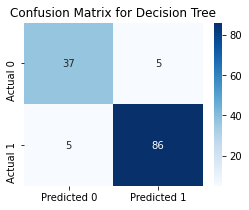



Model Name: Random Forest
Accuracy: 0.8947368421052632
Precision: 0.9230769230769231
Recall: 0.9230769230769231
F1 Score: 0.9230769230769231


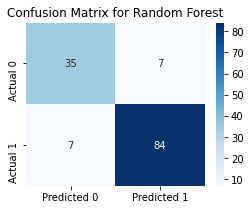



Model Name: Logistic Regression
Accuracy: 0.7744360902255639
Precision: 0.8210526315789474
Recall: 0.8571428571428571
F1 Score: 0.8387096774193549


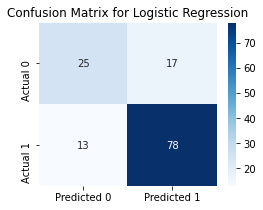



Model Name: Support Vector Machine
Accuracy: 0.8646616541353384
Precision: 0.8842105263157894
Recall: 0.9230769230769231
F1 Score: 0.9032258064516129


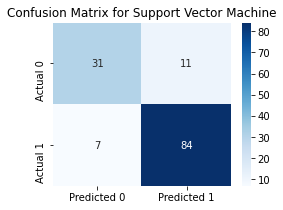



Model Name: K Nearest Neighbors
Accuracy: 0.8421052631578947
Precision: 0.8571428571428571
Recall: 0.9230769230769231
F1 Score: 0.888888888888889


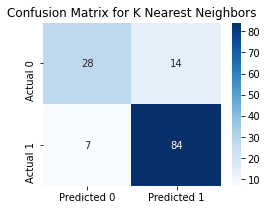

In [56]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)

In [57]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.925,0.925,0.925,0.925
1,Random Forest,0.895,0.895,0.895,0.895
3,Support Vector Machine,0.865,0.863,0.865,0.863
4,K Nearest Neighbors,0.842,0.839,0.842,0.838
2,Logistic Regression,0.774,0.770,0.774,0.771




Model Name: Keras DNN
Accuracy: 0.8345864661654135
Precision: 0.8285714285714286
Recall: 0.9560439560439561
F1 Score: 0.8877551020408164


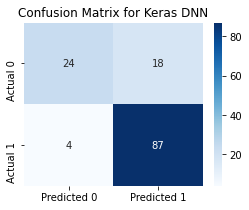

In [58]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))

if 'Keras DNN' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras DNN', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]


# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()


    


In [59]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))



# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()

    
if 'Keras LSTM' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras LSTM', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]



AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)